# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd #импортируем библиотеку pandas
import datetime #импортируем библиотеку datetime для работы с датой
import matplotlib.pyplot as plt
#откроем датасет с помощью pandas, для этого загрузим его в переменную data:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

In [2]:
data.info() #получим общую информацию о датасете
display(data.head(10)) #выведем на экран первые 10 строк data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


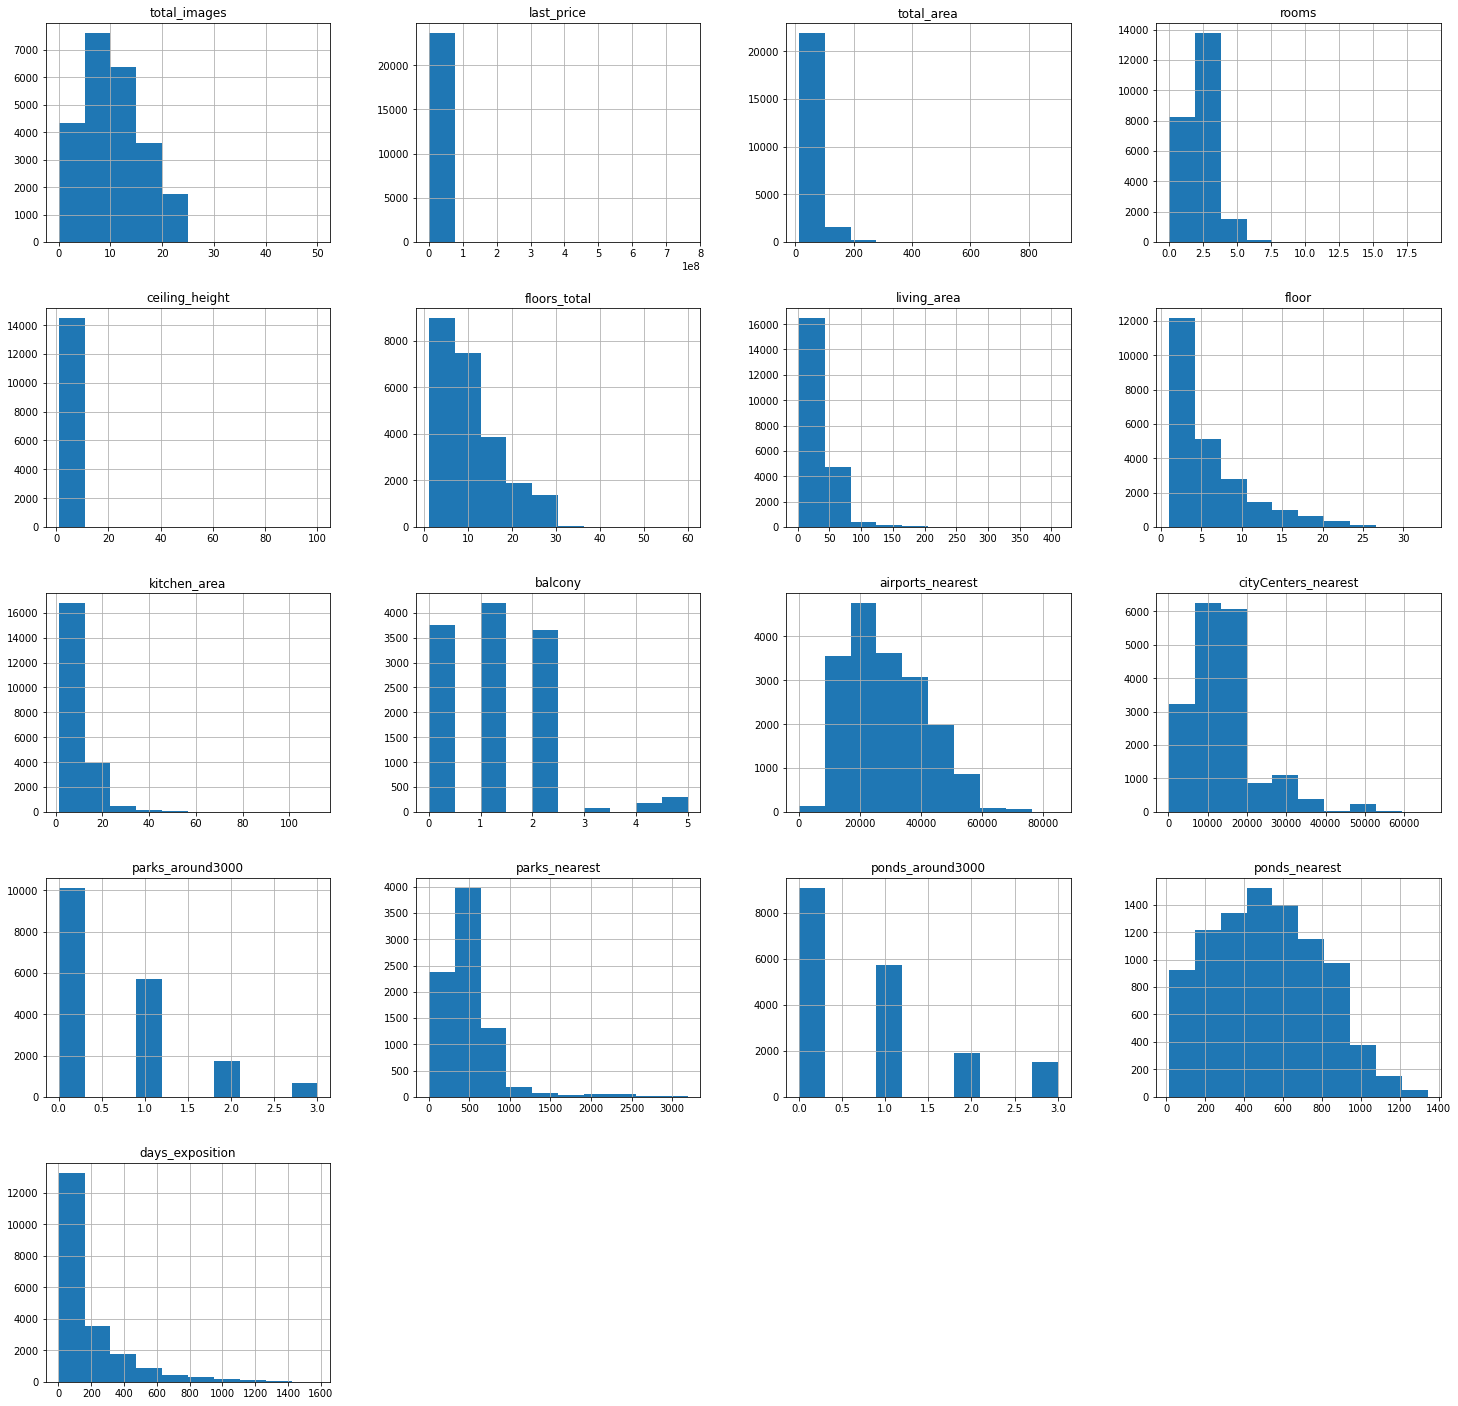

In [3]:
data.hist(figsize=(25,25)) #построим гистограммы для data размером 25 на 25 дюймов
plt.show()

Из гистограмм видим, что есть выбивающиеся значения в следующих столбцах:

1. last_price — цена на момент снятия с публикации
2. total_area — общая площадь квартиры в квадратных метрах (м²)
3. rooms — число комнат
4. ceiling_height — высота потолков (м)
5. floors_total — всего этажей в доме
6. living_area — жилая площадь в квадратных метрах (м²)
7. kitchen_area — площадь кухни в квадратных метрах (м²)

Данные в этих столбцах далее необходимо проверить дополнительно

In [4]:
#Чтобы не перезаписывать данные в data (они могут нам еще понадобиться) создадим копию data для дальнейшей работы
good_data = data
pd.options.mode.chained_assignment = None 

### Предобработка данных

In [5]:
# преобразуем формат столбца 'first_day_exposition' к формату datetime64:
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
good_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Значение общей площади до 20 кв.м. может означать продажу комнаты в квартире или от 10 кв.м. в коммунальной квартире. Исключим такие объявления из датасета. Жилым помещением в 900 кв.м. может являться индивидуальный жилой дом. Для нашего исследования возьмем жильё только класса стандарт и эконом и ограничимся общей площадью не превышающей 200 кв.м. Правильность этого выбора так же подтверждается ранее построенной гистограммой из которой видно, что большинство значений общей площади не превышает 200 кв.м. и данными, полученными методом discribe()

In [7]:
good_data = good_data.query('(total_area <= 200) and (total_area >= 20) or (ceiling_height.isna())') #отфильтруем данные

(2.0, 3.0)

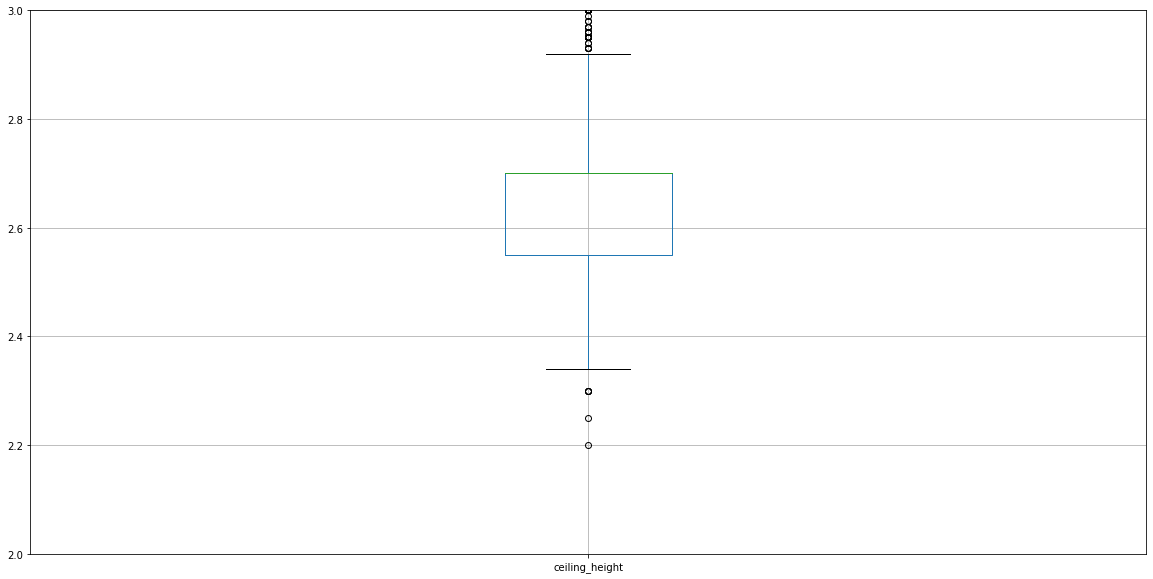

In [101]:
# построим диаграмму размаха
good_data.boxplot(column='ceiling_height', figsize=(20,10), grid=True) 
plt.ylim(2,3)

Диаграмма размах показывет, что выбросами являются данные с высотой потолка от 2,25 м и выше 3,25 метров. Но рассмотрим ситуации с высотой потолка более подробно. Попробуем установить природу появления выбросов, при возможности исправить данные.  

In [9]:
good_data['ceiling_height'].sort_values().head(20) #выведем минимальные значения высоты потолка:

22590    1.00
5712     1.20
16934    1.75
19098    2.00
552      2.00
16884    2.00
2572     2.00
16446    2.00
5850     2.00
4212     2.00
20520    2.00
19329    2.00
22960    2.00
11352    2.00
12755    2.20
17794    2.25
17762    2.30
23498    2.30
1582     2.30
5498     2.30
Name: ceiling_height, dtype: float64

Потолок менее двух метров - это явная ошибка в данных, нужно удалить строки, содержащие такие значения

In [10]:
good_data['ceiling_height'].sort_values(ascending=False).head(30) #выведем максимальные значения высоты потолка:

22869    100.0
22336     32.0
3148      32.0
21377     27.5
10773     27.0
4876      27.0
5807      27.0
17857     27.0
20478     27.0
5246      27.0
21824     27.0
22938     27.0
5669      26.0
11285     25.0
355       25.0
6246      25.0
18545     25.0
9379      25.0
14382     25.0
4643      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
17442      8.0
15743      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [11]:
good_data['ceiling_height'].describe()

count    14343.000000
mean         2.764735
std          1.265148
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В строках, где высота потолка выше 25 метров, вероятнее всего имеется ввиду высота 2.5 метра. Поделим на 10 высоту потолка для потолков выше 25 метров

In [12]:
#выполним замену высоты потолков выше 25 метров на 25/10 с использованием лямбда функции:
good_data['ceiling_height'] = good_data['ceiling_height'].apply(lambda x: x/10 if x>=25 else x)

По данным Cian высота потолков более 3 метров относятся к элитному жилью. Высота потолка более 3 метров может быть связана с наличием в планировке объекта таких архитектурных элементов, как "второй свет" и "этаж антресоль". При наличии таких элементов высота потолка составит удвоенную плошадь этажа. Таким образом, для данного исследования установим максимальную высоту потолка в 6 м. После заполнения пропусков уберем данные превышающие эти значения

In [13]:
good_data = good_data.query('(ceiling_height <= 6) and (ceiling_height > 2) or (ceiling_height.isna())') #удалим строки с ошибочными данными

In [14]:
good_data['rooms'].sort_values(ascending=False).head(10) #выведем максимальные значения числа комнат:

14498    19
20829    14
9688     11
648      11
13397     9
10569     8
21990     8
4435      8
11436     8
8758      8
Name: rooms, dtype: int64

In [15]:
good_data['rooms'].describe() #посмотрим общие статистические сведения о числе комнат

count    23514.000000
mean         2.047929
std          1.023290
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [16]:
good_data = good_data.query('(rooms > 0) or (rooms.isna())') #Удалим данные, содержащие число комнат = 0

Остаьные данные по числу комнат не нуждаются в корректировке

In [17]:
good_data['living_area'].describe() #посмотрим общие статистические сведения по жилой площади

count    21460.000000
mean        33.803834
std         18.982485
min          2.000000
25%         18.700000
50%         30.000000
75%         42.177500
max        332.000000
Name: living_area, dtype: float64

Оставим в датасете только строки с жилой площадью меньшей или равной общей площади

In [18]:
good_data = good_data.query('(living_area <= total_area) or (living_area.isna())') #удалим строки с ошибочными данными, если такие имеются

Оставим в датасете только строки в которых этаж (столбец 'floor') меньше или равен общему количеству этажей (столбец 'floors_total')

In [19]:
good_data = good_data.query('(floor <= floors_total) or (living_area.isna())') #удалим строки с ошибочными данными, если такие имеются

In [20]:
good_data['kitchen_area'].describe() #посмотрим общие статистические данные о размере кухни

count    21234.000000
mean        10.455077
std          5.594213
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Данные по размеру кухни не нуждаются в корректировке

Среди наименований населенных пунктов есть пропуски, такие данные непригодны для дальнейшего анализа удалим строки с такими данными

In [21]:
good_data = good_data.dropna(subset=['locality_name'])

In [22]:
#поиск неявных дубликатов. В data имеется столбец 'locality_name' с типом object, содержащий названия населенного пункта
#приведем названия населенных пунктов к нижнему регистру:
good_data['locality_name'] = good_data['locality_name'].str.lower()
print(good_data['locality_name'].unique()) #выясним уникальные значения этого столбца

['санкт-петербург' 'посёлок шушары' 'городской посёлок янино-1'
 'посёлок парголово' 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'поселок мурино'
 'деревня фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'посёлок металлострой'
 'посёлок городского типа лебяжье' 'посёлок городского типа сиверский'
 'поселок молодцово' 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'поселок городского типа ефимовский'
 'посёлок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посёлок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'поселок новый све

In [23]:
#В наименовании населённых пунктов встречаются наименования содержащие и не содержащие букву "Ё", например: посЁлок и посЕлок
#Заменим букву Ё в названии населенных пунктов на Е используя функцию:

def replace_func(a):
    r=''
    for i in range(len(a)):
        if a[i] == 'ё':
            r = r + 'е'
        else:
            r = r + a[i]
    return(r)
good_data['locality_name'] = good_data['locality_name'].apply(replace_func)
good_data['locality_name'].unique() #Убедимся, что функция сработала корректно:

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

функция сработала корректно. Ё в названиях населенных пунктов изменено на е

In [24]:
#Уберём слова: 'поселок', 'городской поселок' и указание на прочие административно-территориальные типы населенных пунктов 

def replace_func_location(a):
    location_replace = ['село', 'поселок', 'городской', 'деревня', 'городского', 'типа', 'садовое', 'некоммерческое', 'товарищество', 'садоводческое', 'коттеджный', 'станции']
    r = a.rsplit()
    r_new = []
    for word in r:
        if word not in location_replace:
            r_new.append(word)
    return(' '.join(r_new))
good_data_location = good_data
good_data_location['locality_name'] = good_data_location['locality_name'].apply(replace_func_location)
good_data_location['locality_name'].unique() #Убедимся, что функция сработала корректно:


array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

функция сработала корректно. Далее можно сравнить количество уникальных наименований населенных пунктов в data, good_data и good_data_location

In [25]:
#сравним количество уникальных локаций в data, good_data & good_data_location:
print('Количество уникальных локаций в good_data_location составило:', good_data_location['locality_name'].value_counts().count())
print('Количество уникальных локаций в good_data составило:', good_data['locality_name'].value_counts().count())
print('Количество уникальных локаций в data составило:', data['locality_name'].value_counts().count()) 

Количество уникальных локаций в good_data_location составило: 304
Количество уникальных локаций в good_data составило: 304
Количество уникальных локаций в data составило: 364


good_data_location и good_data содержат одинаковое число уникальных населенных пунктов.
Таким образом, убирать из good_data указание на тип населенного пункта не требуется.
Далее good_data_location не используем

In [26]:
good_data.isna().sum() #Найдем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8999
floors_total               30
living_area              1859
floor                       0
is_apartment            20490
studio                      0
open_plan                   0
kitchen_area             2028
balcony                 11324
locality_name               0
airports_nearest         5433
cityCenters_nearest      5413
parks_around3000         5412
parks_nearest           15320
ponds_around3000         5412
ponds_nearest           14349
days_exposition          3119
dtype: int64

In [27]:
#Проверим количество пропусков в процентах
pd.DataFrame(round(good_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Проверить колличество пропусков в % можно и вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100))

**Вывлены пропуски данных в следующих столбцах:**
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м) **Можно попробовать заполнить медианным значением**
2. balcony — число балконов **вероятно, что балкон отсутствует. Заменим пропуски на 0**
3. ceiling_height — высота потолков (м) **пропуски можно заменить на медианное значение высоты потолка для каждого города**
4. cityCenters_nearest — расстояние до центра города (м) **Можно попробовать заполнить медианным значением**
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия) **заполним пропуски медианным значением для каждого города**
6. floors_total — всего этажей в доме **пока непонятно, что делать с этими пропусками. Нужно запросить дополнительную информацию или удалить эти строки** 
7. is_apartment — апартаменты (булев тип) **необходимо посмотреть уникальные значения столбца, все значения кроме True заменить на False**
8. kitchen_area — площадь кухни в квадратных метрах (м²) **вероятнее всего это студии или коммунальные квартиры. Заменим пропуски на  0**
9. living_area — жилая площадь в квадратных метрах (м²) **пока непонятно, что делать с этими пропусками. Нужно запросить дополнительную информацию или заполнить медианными значениями для каждого населенного пункта**
10. locality_name — название населённого пункта **удалим строки с пропусками в данном столбце - они непригодны для анализа**
11. parks_around3000 — число парков в радиусе 3 км **вероятнее всего в радиусе 3 км нет парков для таких объектов. Заполним пропуки 0**
12. parks_nearest — расстояние до ближайшего парка (м) **заполним пропуски медианным значением для каждого города**
13. ponds_around3000 — число водоёмов в радиусе 3 км **вероятнее всего в радиусе 3 км нет водоёмов. Заполним пропуки 0**
14. ponds_nearest — расстояние до ближайшего водоёма (м) **заполним пропуски медианным значением для каждого города**

**Определим следующий алгоритм действий по устранению пропусков в данных:**
1. Заменим пропуски на медианные значения **для каждого в отдельности населенного пункта** в следующих столбцах: 'airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'parks_nearest', 'ponds_nearest'
2. Заменим пропуски в жилой площади 'living_area' медианными значениями исходя из числа коммнат в помещении, столбец 'rooms'
3. Заменим пропуски на 0 в следующих столбцах: 'balcony', 'parks_around3000', 'ponds_around3000', 'kitchen_area'
4. Удалим строки с пропусками в столбце 'floors_total'
5. Все значения не True в столбце 'is_apartment' заменим на False


In [28]:
#создадим списки из названий столбцов в соответствии с выбранным выше агоритмом:
a1 = ['airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'days_exposition', 'parks_nearest', 'ponds_nearest']
a2 = ['balcony', 'parks_around3000', 'ponds_around3000', 'kitchen_area']
#заполним пропуски по медианным значениям для каждого уникального названия населенного пункта
for name_columns in a1:  
    for locality in good_data['locality_name'].unique():
        good_data.loc[(good_data['locality_name'] == locality) & (good_data[name_columns].isna()), name_columns] = \
        good_data.loc[(good_data['locality_name'] == locality), name_columns].median()
# Заполним пропуски в жилой площади'living_area' медианными значениями в соответствии с числом комнат у такого помещения 'rooms'
for rooms in good_data['rooms'].unique():
    good_data.loc[(good_data['rooms'] == rooms) & (good_data['living_area'].isna()), 'living_area'] = \
    good_data.loc[(good_data['rooms'] == rooms), 'living_area'].median()
#В соответствии с выбранным агоритмом заменим пропуски в столбцах на 0:        
for name_columns in a2: 
    good_data[name_columns] = good_data[name_columns].fillna(0)
#В соответствии с выбранным агоритмом заменим удалим пустые строки в столбце 'floors_total'        
good_data = good_data.dropna(subset=['floors_total'])
#Все значения не True в столбце 'is_apartment' заменим на False
good_data['is_apartment'] = good_data['is_apartment'].where(good_data['is_apartment'] == True, False).astype('bool')

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Некоторые столбцы можно поменять на значения, относительно своего района и этажности (например высота пололков). Вот так
    
    
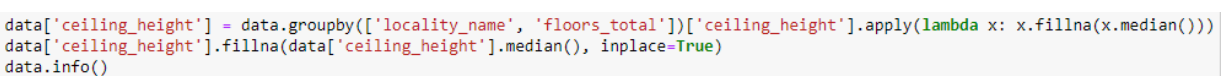
    

In [29]:
good_data.isna().sum() #Найдем количество пропущенных значений для каждого столбца

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height            93
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4761
cityCenters_nearest     4761
parks_around3000           0
parks_nearest           5891
ponds_around3000           0
ponds_nearest           4868
days_exposition           33
dtype: int64

Оставшиеся пропуски заменим медианными значениями не для каждого населенного пункта в отдельности, а для всего столбца

In [30]:
a3 = ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition']
for name_columns in a3: #В соответствии с выбранным агоритмом заменим пропуски в столбцах на медианные значения:
    median = good_data[name_columns].median()
    good_data[name_columns] = good_data[name_columns].fillna(median)

In [31]:
good_data.isna().sum() #Убедимся, что все пропуски в данных удалены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [32]:
# преобразуем столбец 'floor_total',  'parks_around3000', 'ponds_around3000' к int:
good_data['floors_total'] = good_data['floors_total'].astype('int')
good_data['parks_around3000'] = good_data['parks_around3000'].astype('int')
good_data['ponds_around3000'] = good_data['ponds_around3000'].astype('int')

In [33]:
good_data.reset_index(drop= True , inplace= True) #сбросим индекс после удаления строк:

In [34]:
good_data.info() #ещё раз посмотрим общие сведения по good_data после окончания предобработки данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23193 entries, 0 to 23192
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23193 non-null  int64         
 1   last_price            23193 non-null  float64       
 2   total_area            23193 non-null  float64       
 3   first_day_exposition  23193 non-null  datetime64[ns]
 4   rooms                 23193 non-null  int64         
 5   ceiling_height        23193 non-null  float64       
 6   floors_total          23193 non-null  int64         
 7   living_area           23193 non-null  float64       
 8   floor                 23193 non-null  int64         
 9   is_apartment          23193 non-null  bool          
 10  studio                23193 non-null  bool          
 11  open_plan             23193 non-null  bool          
 12  kitchen_area          23193 non-null  float64       
 13  balcony         

In [35]:
#проверим наличие дубликатов в исправленном датасете
print(good_data.duplicated().sum())

0


Полность повторяющиеся строки не найдены, данные очищены от дубликатов

#### Промежуточный вывод

Была осуществлена предобработка данных, включающая в себя:

1. Изменение типов данных;
2. Фильтрацию ошибочных данных в датасете;
2. Поиск дубликатов в наименовании населенных пунктов и их устранение;
3. Заполнение пропусков в данных в соответствии с определенным алгоритмом.

При этом количество строк в датасете изменилось с 23698 до 23380 штук

### Проведём исследовательский анализ данных

#### Добавим в таблицу следующие столбцы:
1. цена одного квадратного метра 'price_square';
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) 'day';
3. месяц публикации объявления 'month';
4. год публикации объявления 'year';
5. тип этажа квартиры (значения — «первый», «последний», «другой») 'floor_type';
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [36]:
#цена одного квадратного метра в тысячах рублей за кв.м.:
good_data['price_square'] = round((good_data['last_price'] / good_data['total_area']/1000), 2)

In [37]:
#цена жилого помещения в миллионах рублей:
good_data['last_price'] = round((good_data['last_price'] / 1000000), 2)

In [38]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
good_data['day'] = good_data['first_day_exposition'].apply(lambda x: x.weekday()).astype('int')

In [39]:
#месяц публикации объявления (1 - январь, 12 -декабрь)
good_data['month'] = good_data['first_day_exposition'].apply(lambda x: x.strftime("%m")).astype('int')

In [40]:
#год публикации объявления
good_data['year'] = good_data['first_day_exposition'].apply(lambda x: x.strftime("%Y")).astype('int')

В датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. можно использовать метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 

Этот метод нужен для визуализации динамики по неделям, месяцам или годам 
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца отобразится первый день месяца ('2019-05-01')

In [41]:
good_data['floor_type'] = good_data['floor']
def floor_type(n): #с помощью функции определим тип этажа (значения — «первый», «последний», «другой»)
    if good_data['floor'][n] == 1:
        floor_data = 'первый'
    elif good_data['floor'][n] == good_data['floors_total'][n]:
        floor_data = 'последний'
    else:
        floor_data = 'другой'
    return floor_data
good_data['floor_type'] = good_data['floor_type'].apply(floor_type)

In [42]:
# разделив значение в метрах на 1000 получим значение в километрах 
nearest = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
for i in nearest:
    good_data[i] = round(good_data[i] / 1000)

In [43]:
display(good_data.head()) #выведем на экран первые 5 строк good_data и убедимся, что все преобразования сработали корректно

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,day,month,year,floor_type
0,20,13.00,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,0.0,2,1.0,95.0,120.37,3,3,2019,другой
1,7,3.35,40.4,2018-12-04,1,2.60,11,18.6,1,False,...,0,0.0,0,1.0,81.0,82.92,1,12,2018,первый
2,10,5.20,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,1,0.0,2,1.0,558.0,92.79,3,8,2015,другой
3,0,64.90,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,2,0.0,3,0.0,424.0,408.18,4,7,2015,другой
4,2,10.00,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,0.0,1,0.0,121.0,100.00,1,6,2018,последний


#### изучим следующие параметры:
  - общая площадь - 'total_area';
  - жилая площадь - 'living_area';
  - площадь кухни - 'kitchen_area';
  - цена объекта - 'last_price';
  - количество комнат - 'rooms';
  - высота потолков - 'ceiling_height';
  - этаж квартиры - 'floor';
  - тип этажа квартиры («первый», «последний», «другой») - 'floor_type';
  - общее количество этажей в доме - 'floors_total';
  - расстояние до центра города в метрах - 'cityCenters_nearest';
  - расстояние до ближайшего аэропорта - 'airports_nearest';
  - расстояние до ближайшего парка - 'parks_nearest';
  - день и месяц публикации объявления - 'day' & 'month'

Для этого построим гистограммы для каждого параметра, определим коэффициенты линейной корреляции между параметром и ценой квадратного метра объекта  

##### общая площадь - 'total_area'

<AxesSubplot:>

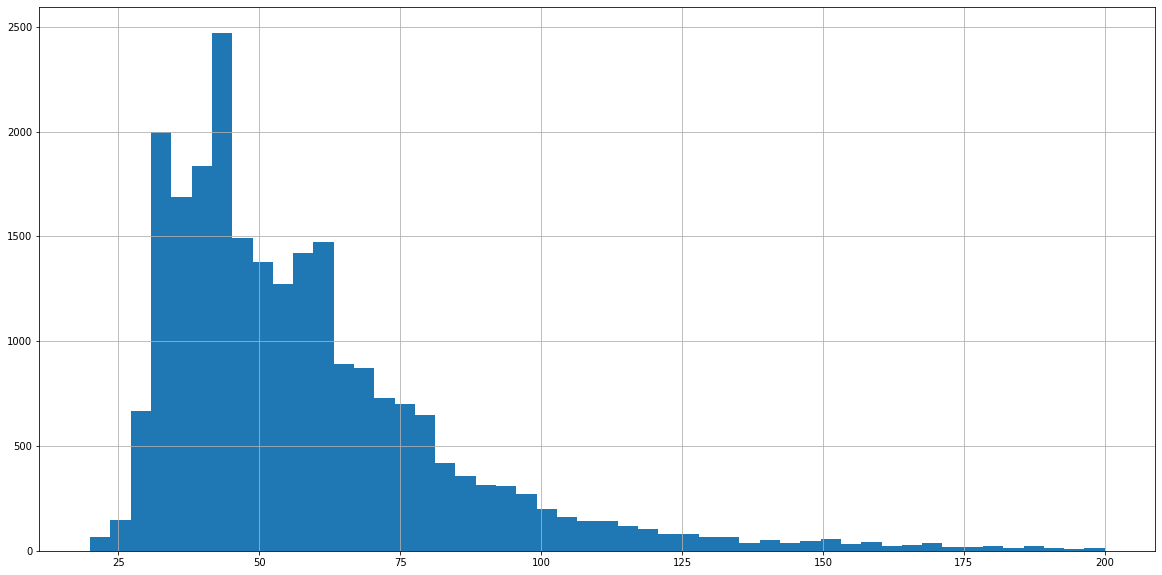

In [44]:
good_data['total_area'].hist(bins=50, figsize=(20,10), range=(20, 200))

In [45]:
good_data['total_area'].median()

52.0

Наиболее распространены жилые помещения с общей площадью около 50 кв.м

##### количество комнат - 'rooms'

<AxesSubplot:>

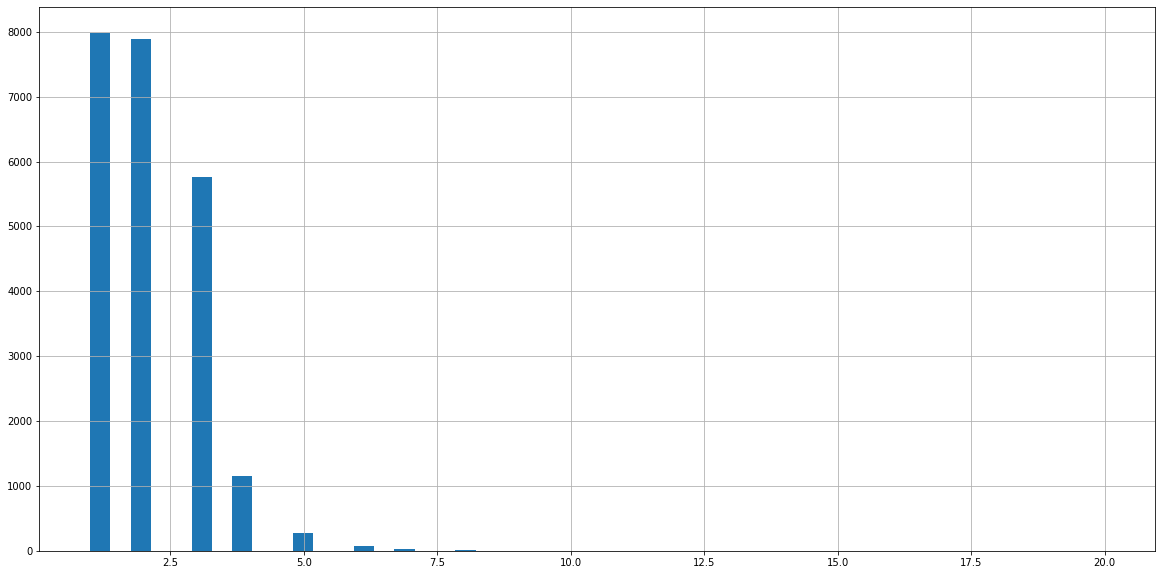

In [46]:
good_data['rooms'].hist(bins=50, figsize=(20,10), range=(1, 20))

<AxesSubplot:>

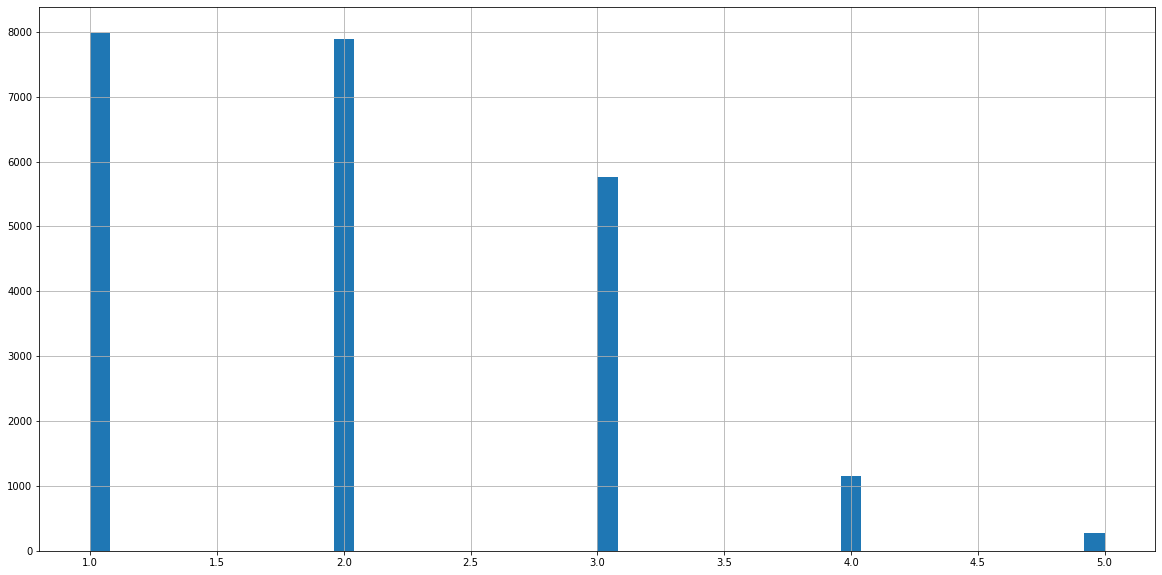

In [47]:
good_data['rooms'].hist(bins=50, figsize=(20,10), range=(1, 5))

Из гистограммы видна распространенность числа комнат в жилых помещениях. Однокомнатные и двухкомнатные жилые помещения являются наиболее распространенными

##### площадь кухни - 'kitchen_area'

<AxesSubplot:>

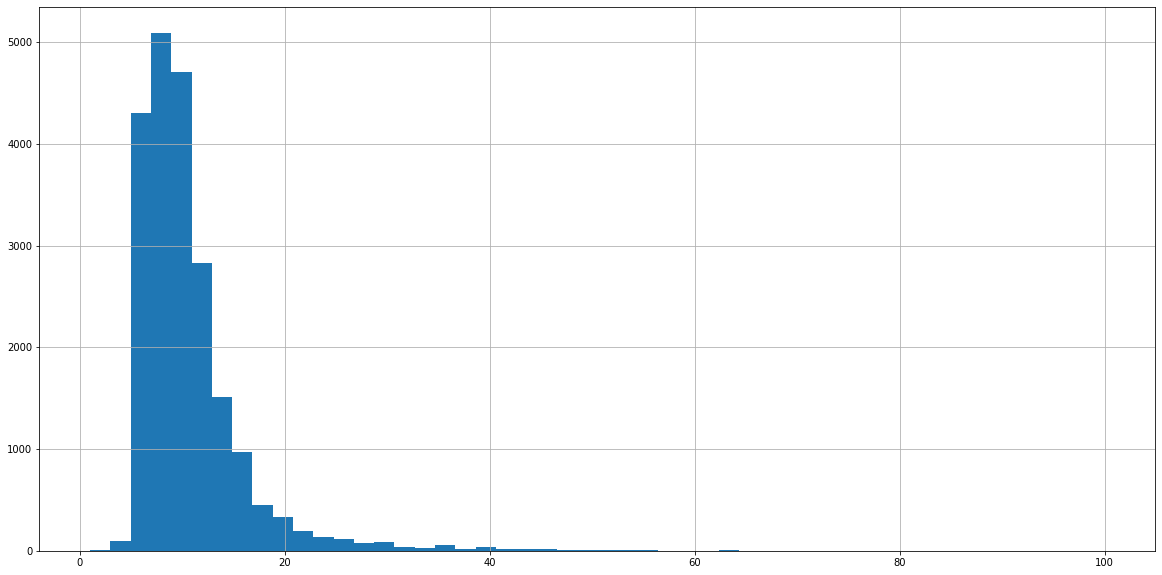

In [48]:
good_data['kitchen_area'].hist(bins=50, figsize=(20,10), range=(1, 100))

<AxesSubplot:>

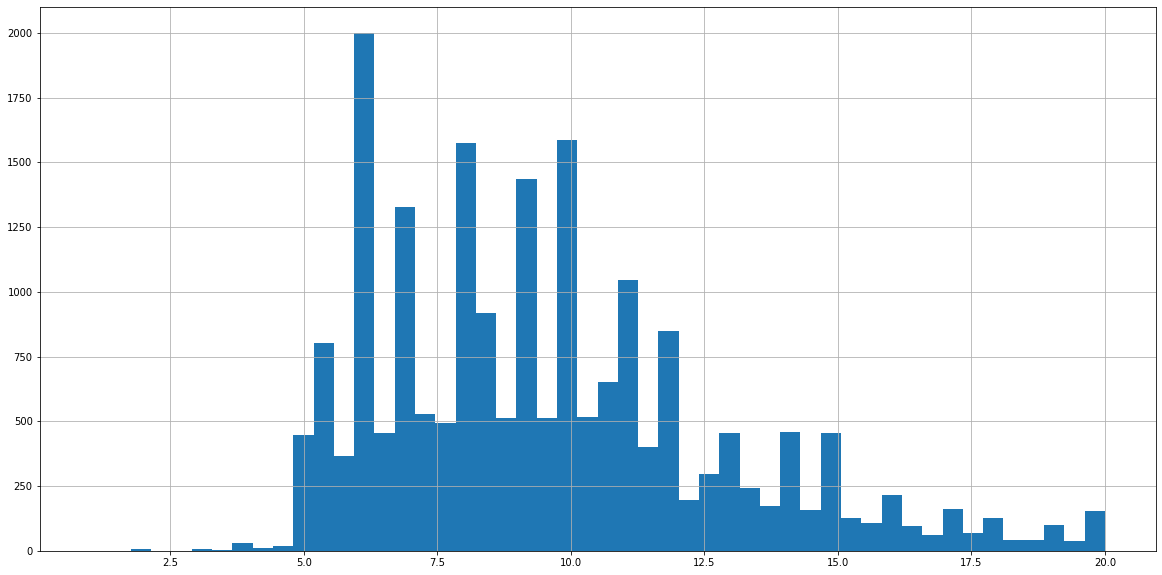

In [49]:
good_data['kitchen_area'].hist(bins=50, figsize=(20,10), range=(1, 20))

Наиболее распространены жилые помещения с кухней от 5 до 15 кв.м. наиболее распространены помещения с кухней площадью около 6 кв.м. 

##### цена объекта - 'last_price'

<AxesSubplot:>

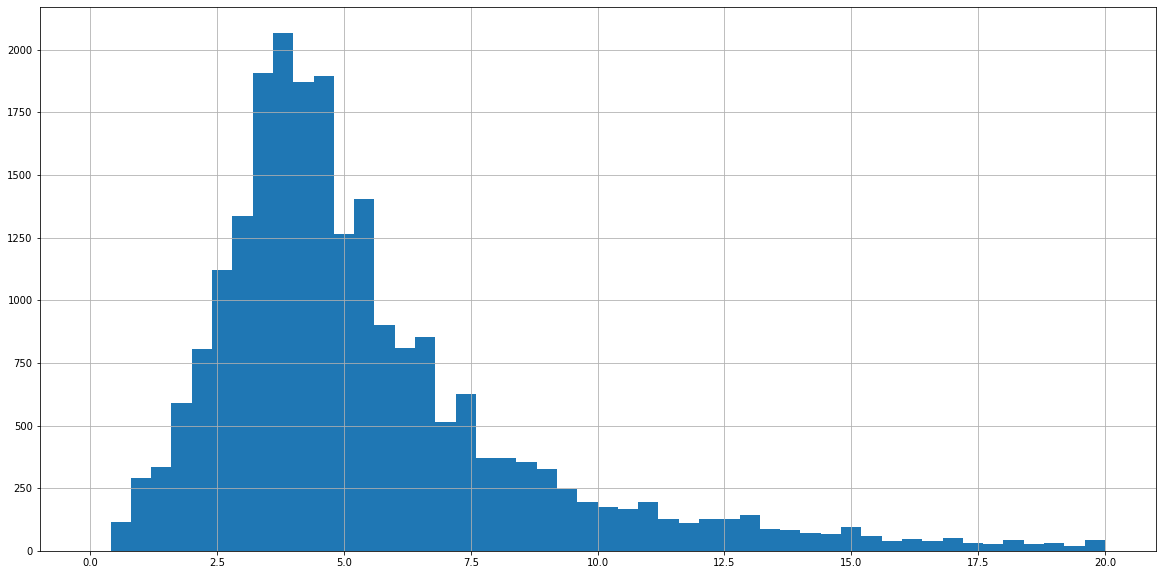

In [50]:
good_data['last_price'].hist(bins=50, figsize=(20,10), range=(0, 20))

Самую высокую распространенность имеют жилые помещения стоимость 3-4.5 млн.руб.

##### высота потолков - 'ceiling_height'

<AxesSubplot:>

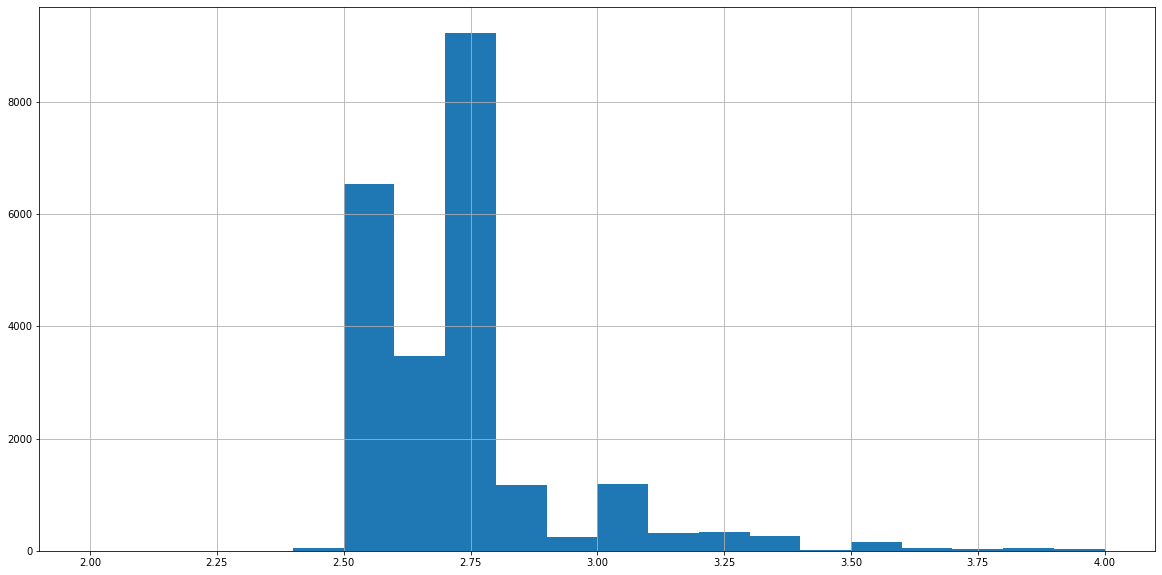

In [51]:
good_data['ceiling_height'].hist(bins=20, figsize=(20,10), range=(2, 4))

Жилые помещения с высотой потолка около 2.5 м, а также с высотой потолка около 2.7 м являются наиболее распространенными

##### этаж квартиры - 'floor'

<AxesSubplot:>

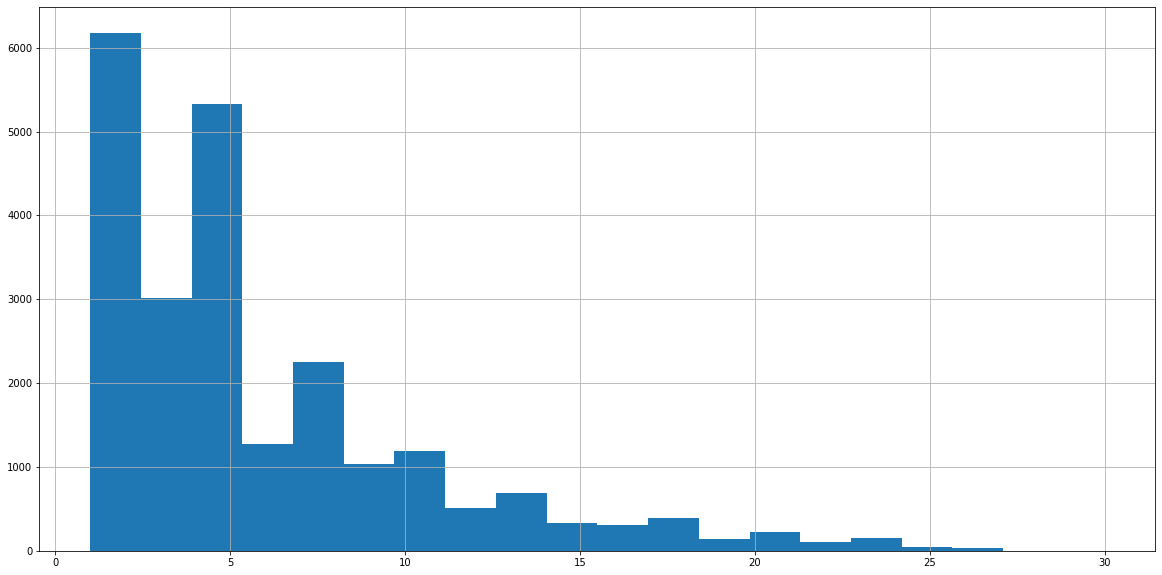

In [52]:
good_data['floor'].hist(bins=20, figsize=(20,10), range=(1, 30))

<AxesSubplot:>

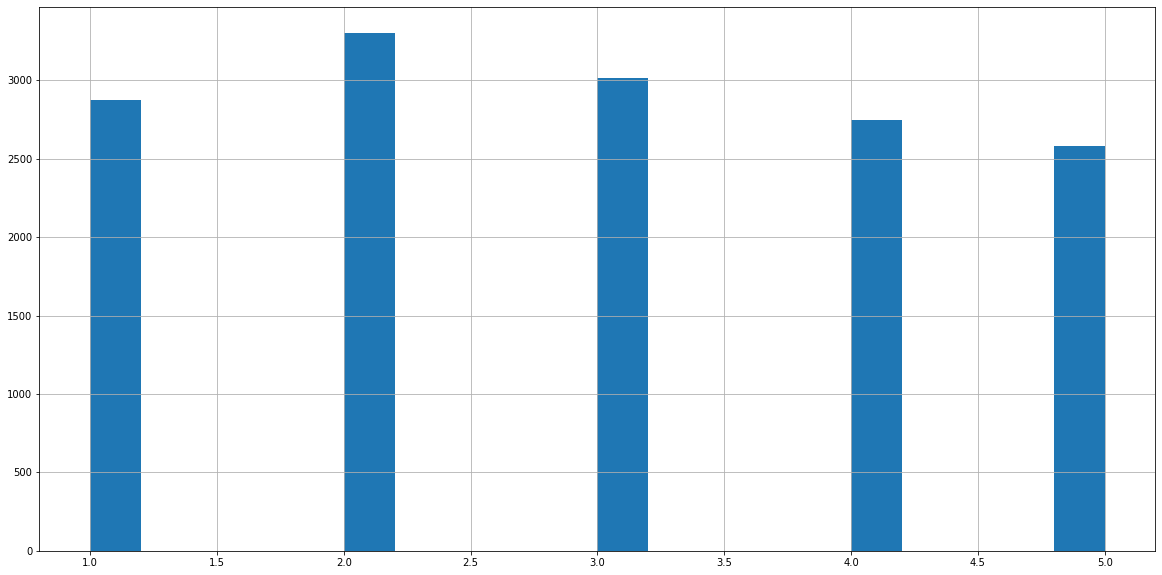

In [53]:
good_data['floor'].hist(bins=20, figsize=(20,10), range=(1, 5))

Наиболее распространенными являются 2 этажные жилые дома. Вероятно, что данные объекты являются индивидуальными жилыми домами

##### тип этажа квартиры («первый», «последний», «другой») - 'floor_type'

<AxesSubplot:>

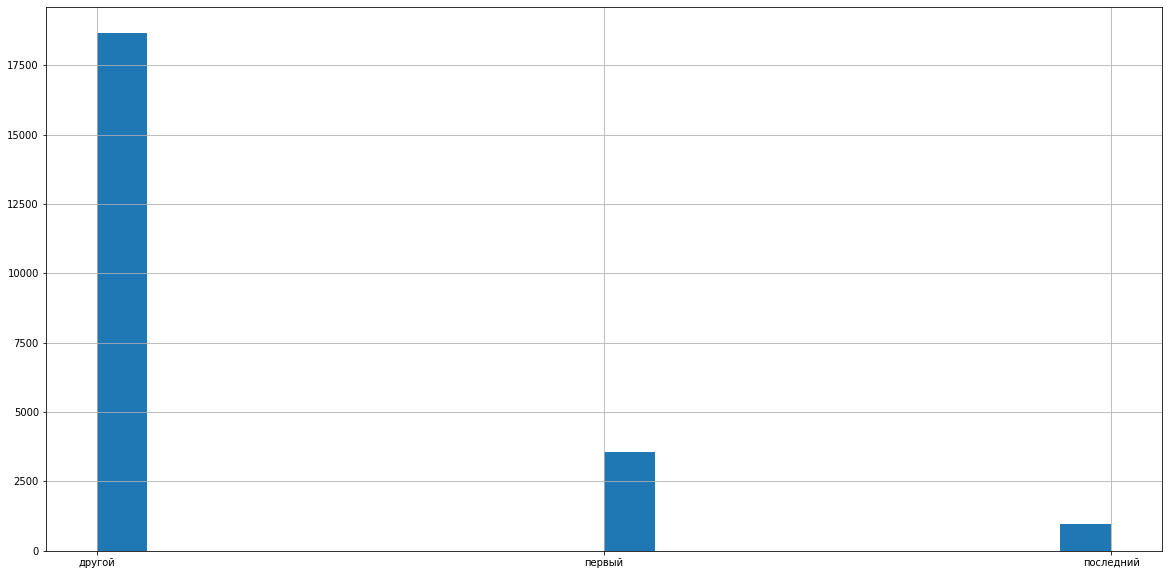

In [54]:
good_data['floor_type'].hist(bins=20, figsize=(20,10))

Первые этажи продаются значительно чаще, чем последние. Это интересный факт, требующий дополнительного исследования 

##### общее количество этажей в доме - 'floors_total'

<AxesSubplot:>

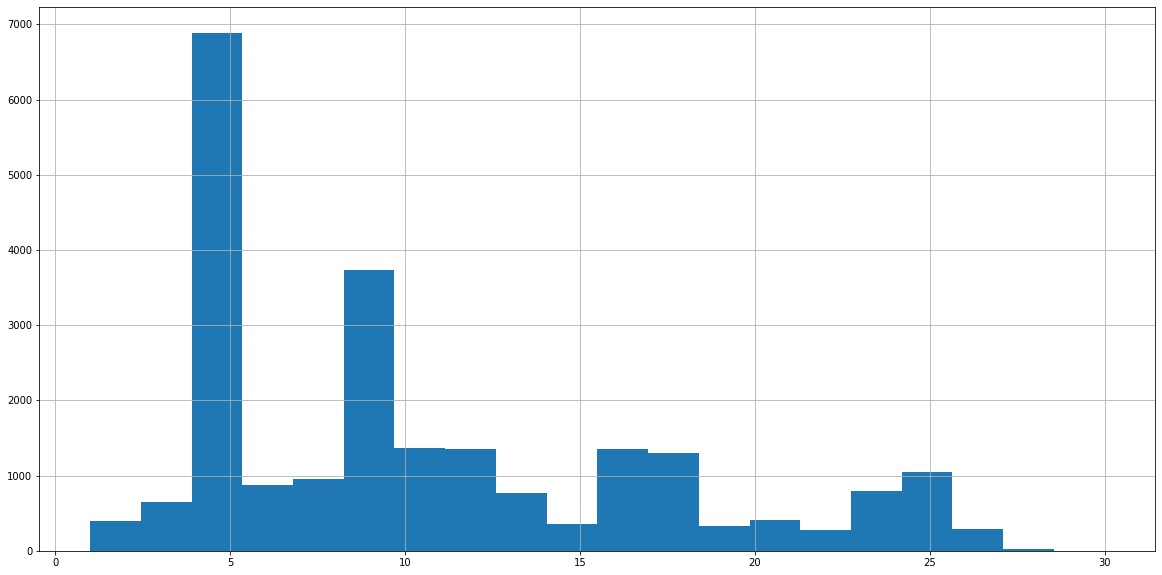

In [55]:
good_data['floors_total'].hist(bins=20, figsize=(20,10), range=(1, 30))

На гистограмме видим, что имеется чаще всего жилые дома имеют этажность 5, 9, 16, 18 - т.е. типовая этажнась, применяемая в строительстве многоквартирных жилых домов. Наиболее распространены 5 этажные жилые дома. С учетом полученных выше данных о площадях кухни (наиболее распространенная площадь около 6 кв.м.), можно сделать вывод, что наиболее распростронены 5 этажные "Хрущевки"

##### расстояние до центра города в метрах - 'cityCenters_nearest'

<AxesSubplot:>

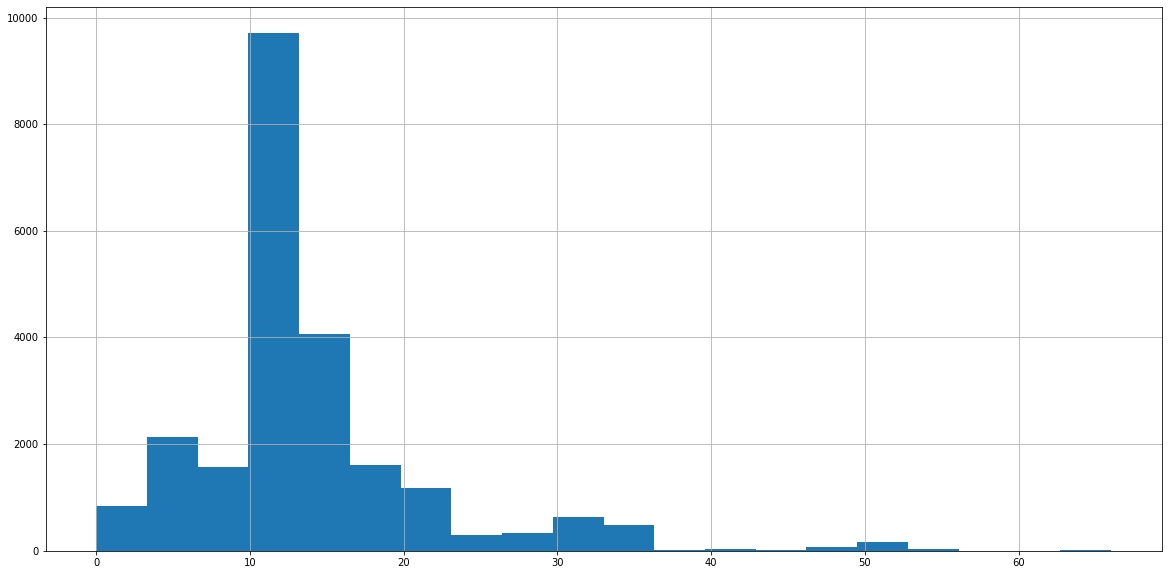

In [56]:
good_data['cityCenters_nearest'].hist(bins=20, figsize=(20,10))

<AxesSubplot:>

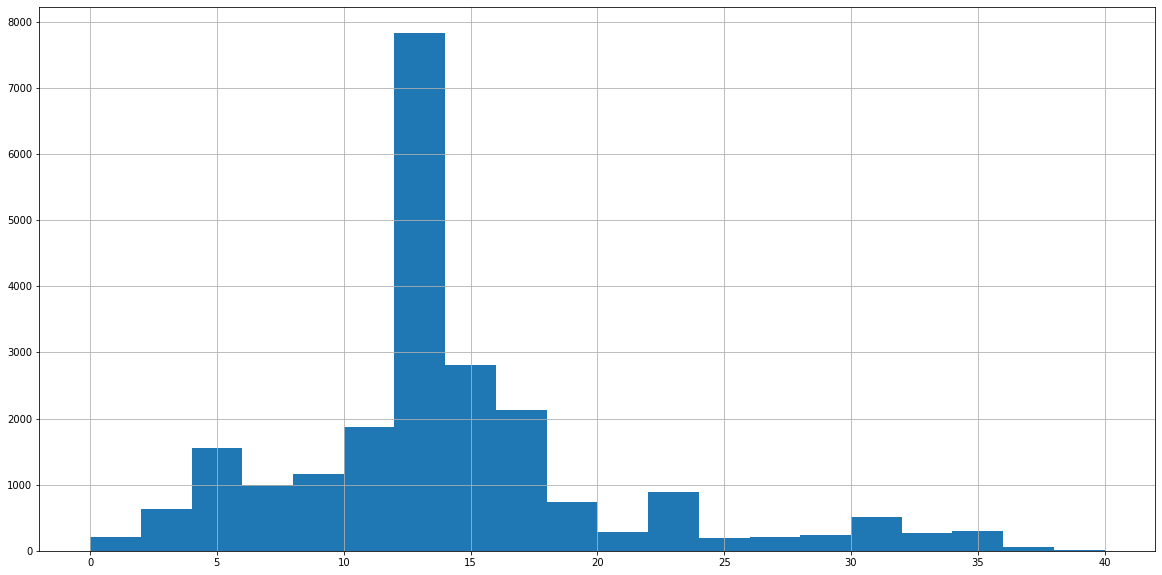

In [57]:
good_data['cityCenters_nearest'].hist(bins=20, figsize=(20,10), range=(0, 40))

Большая часть жилых помещений сосредоточена на расстоянии 12 км от города. Значения расстояния более 20 км означает, что за центр города принят центр Санкт-Петербурга

##### расстояние до ближайшего аэропорта - 'airports_nearest'

<AxesSubplot:>

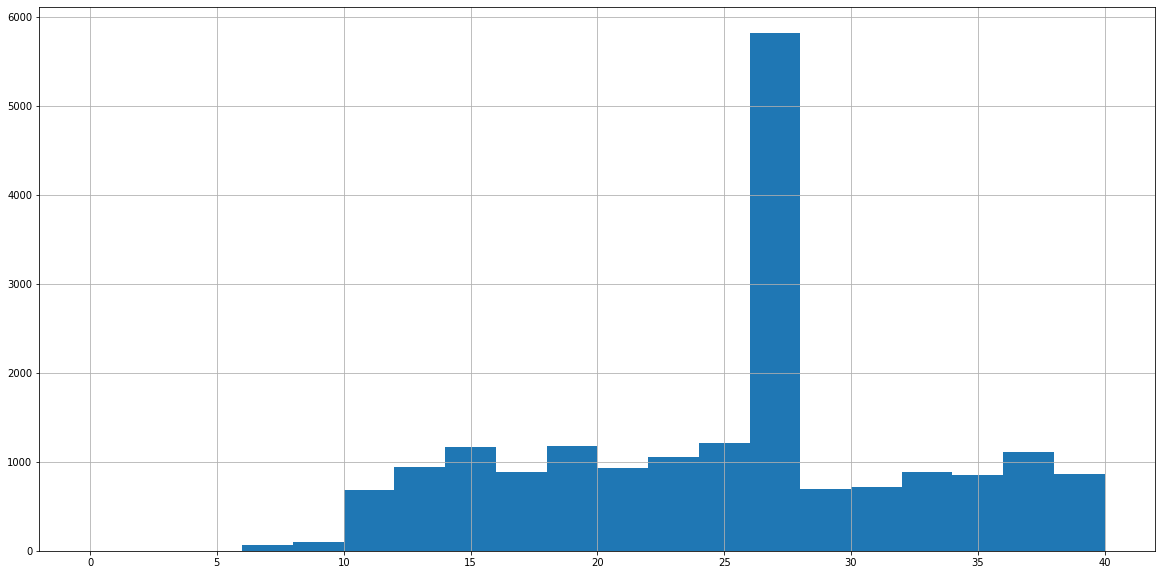

In [58]:
good_data['airports_nearest'].hist(bins=20, figsize=(20,10), range=(0, 40))

Большая часть жилых помещений сосредоточена на расстоянии 26-27 км от аэропорта

##### расстояние до ближайшего парка - 'parks_nearest'

<AxesSubplot:>

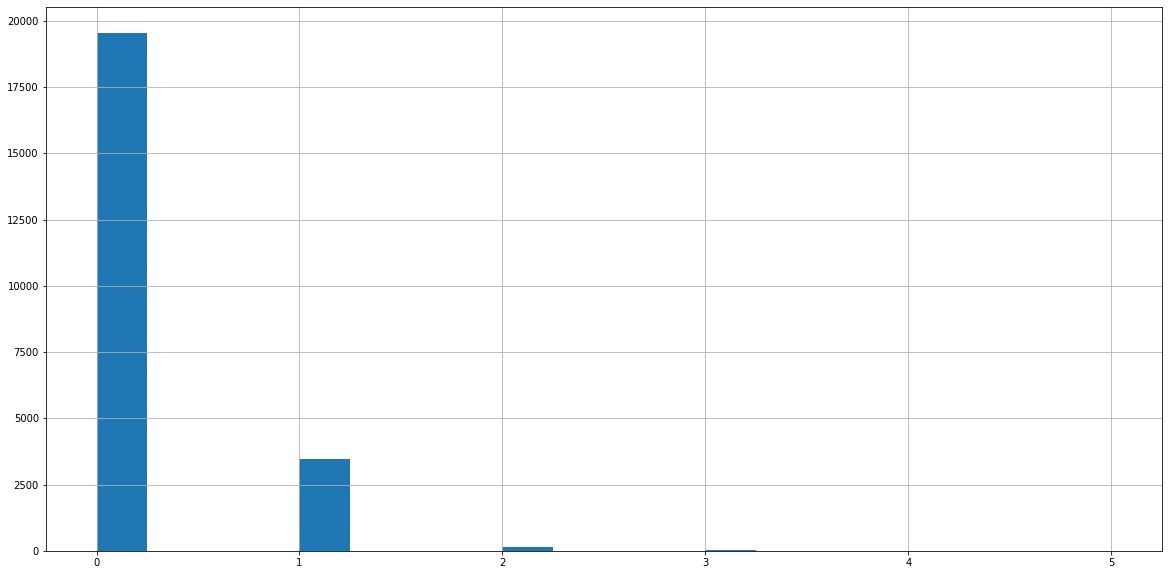

In [59]:
good_data['parks_nearest'].hist(bins=20, figsize=(20,10), range=(0, 5))

Для большенства помещений парк находится на расстоянии менее 1 километра

##### день и месяц публикации объявления - 'day' и 'month'

<AxesSubplot:>

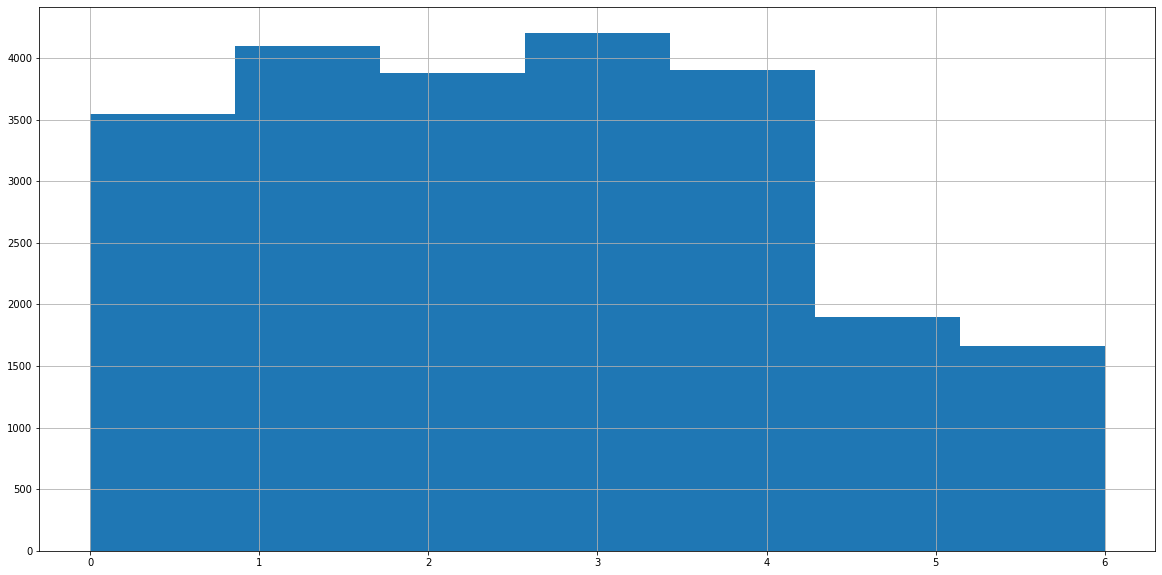

In [60]:
good_data['day'].hist(bins=7, figsize=(20,10))

Чаще всего объявления о продаже размещаются в четверг. В выходные дни объявления размещаются реже всего

<AxesSubplot:>

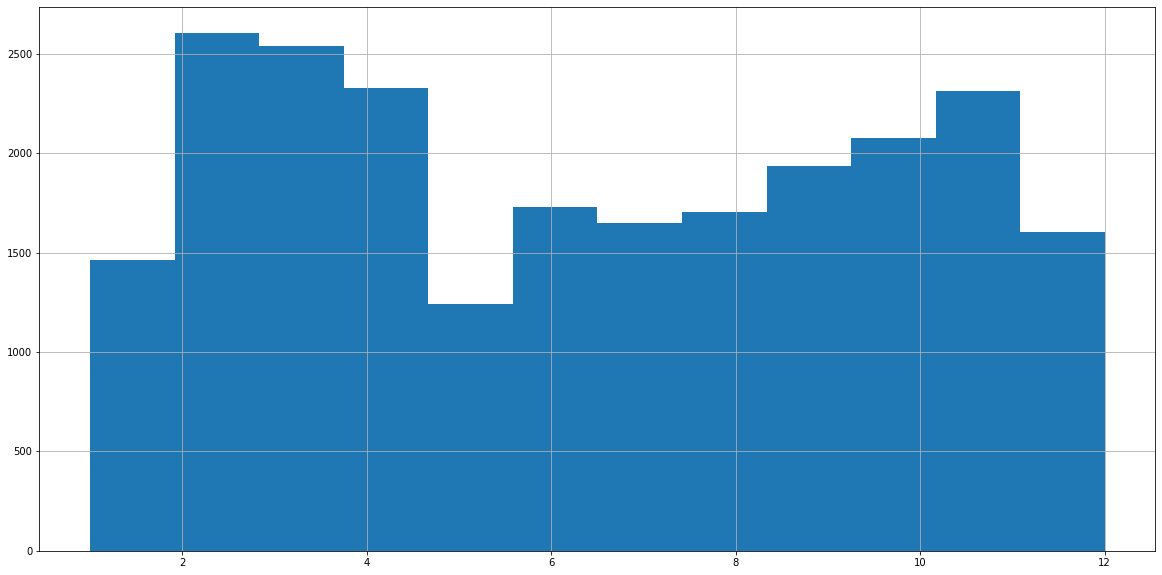

In [61]:
good_data['month'].hist(bins=12, figsize=(20,10))

Чаще всего объявления о продаже размещают в марте и феврале. Реже всего в мае и январе

#### Изучим, как быстро продавались квартиры (столбец 'days_exposition')
Для этого построим гистограмму, найдем среднее и медиану


<AxesSubplot:>

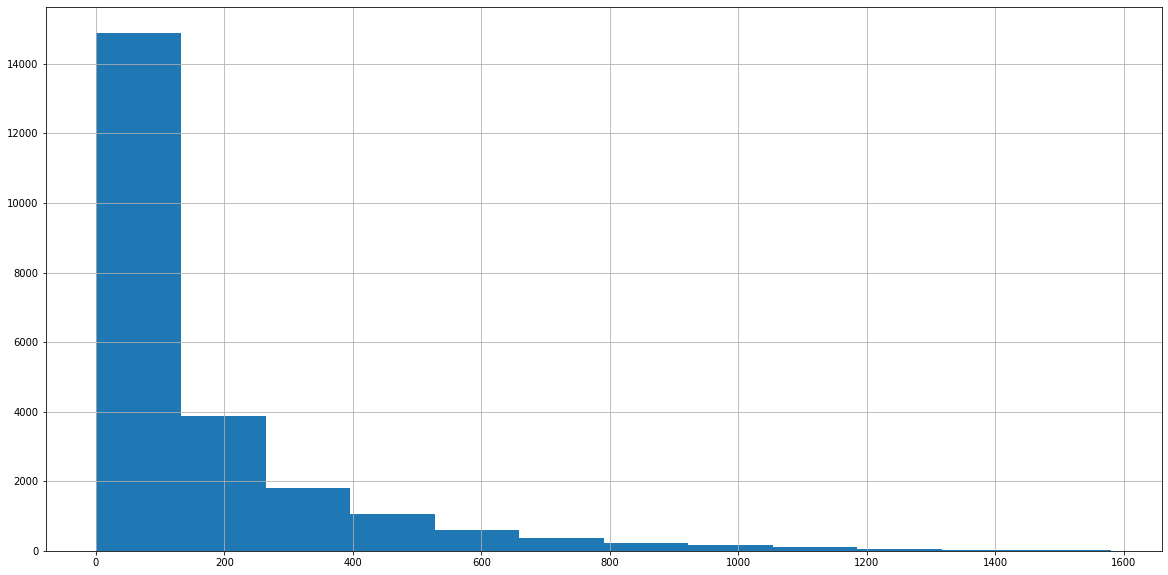

In [62]:
good_data['days_exposition'].hist(bins=12, figsize=(20,10))

<AxesSubplot:>

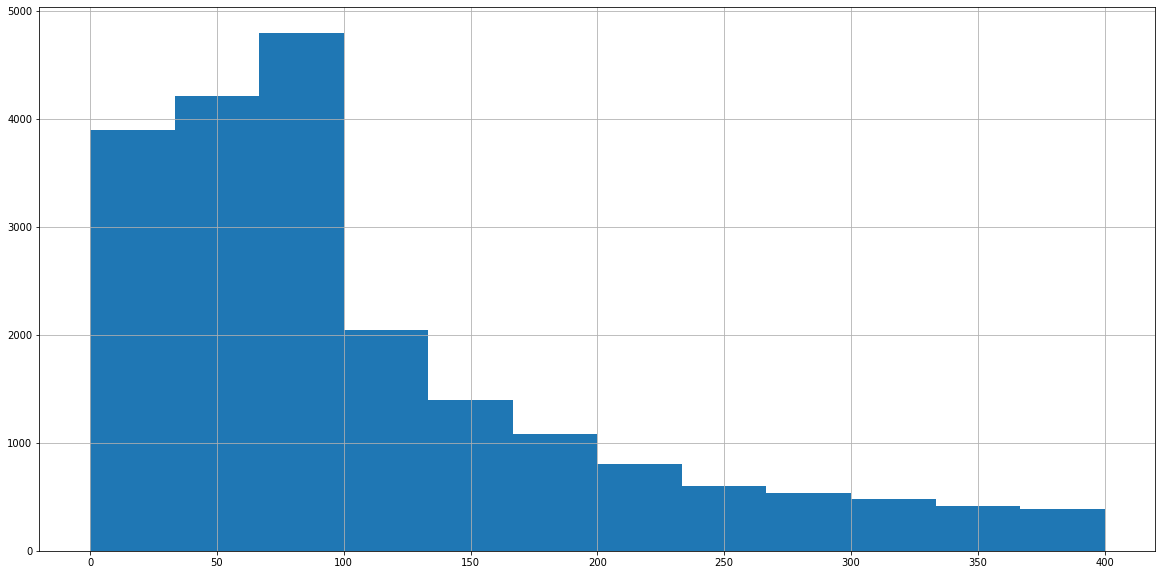

In [63]:
good_data['days_exposition'].hist(bins=12, figsize=(20,10), range=(0, 400))

In [64]:
#Найдем среднее значение длительности продажи:
good_data['days_exposition'].mean()

169.8865606001811

In [65]:
#Найдем медианное значение длительности продажи:
good_data['days_exposition'].median()

95.0

<AxesSubplot:>

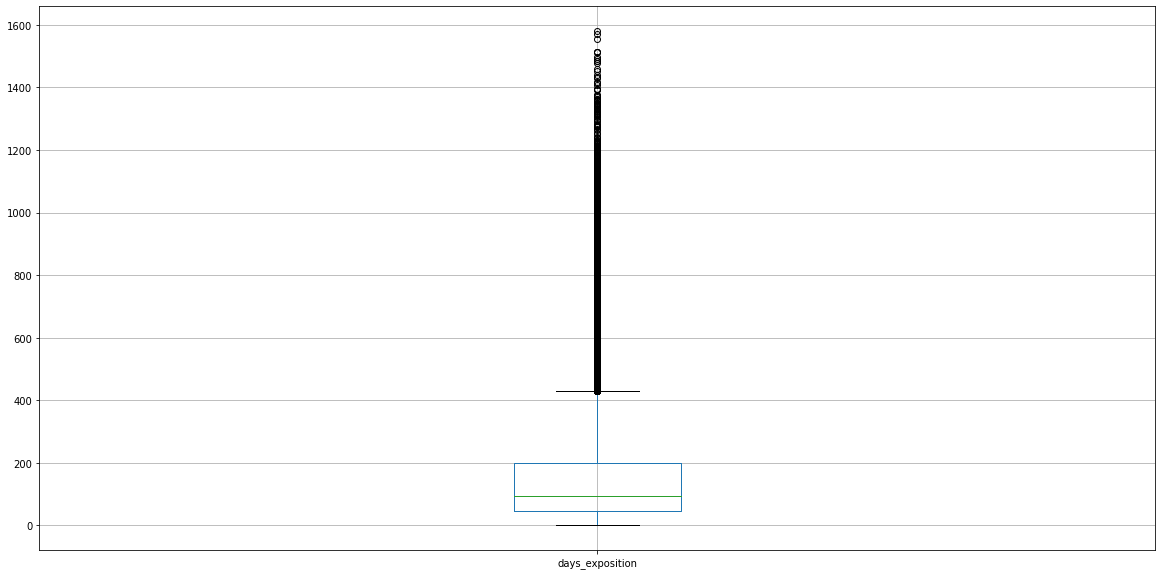

In [66]:
# построим диаграмму размаха
good_data.boxplot(column='days_exposition', figsize=(20,10), grid=True) 

половина всех квартир (медиана) продалась за 94 дня - около 3-х месяцев. Но среднее значение времени продажи составляет 169 дней - около полугода. Разница обусловлена неравномерностью зависимости числа объявлений от срока продажи. В данных присутствуют жилые помещения, которые продавались более 4-х лет.

Быстрыми продажами будем считать количество дней экспозиции объявлений не превышающее верхнюю квартиль (75% выборки). Исходя из данного критерия быстрыми продажами являются продажи в течении 200 дней с даты размещения объявления о продаже 

#### изучим взаимосвязь стоимости с другими параметрами:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

##### общая площадь - 'total_area'

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

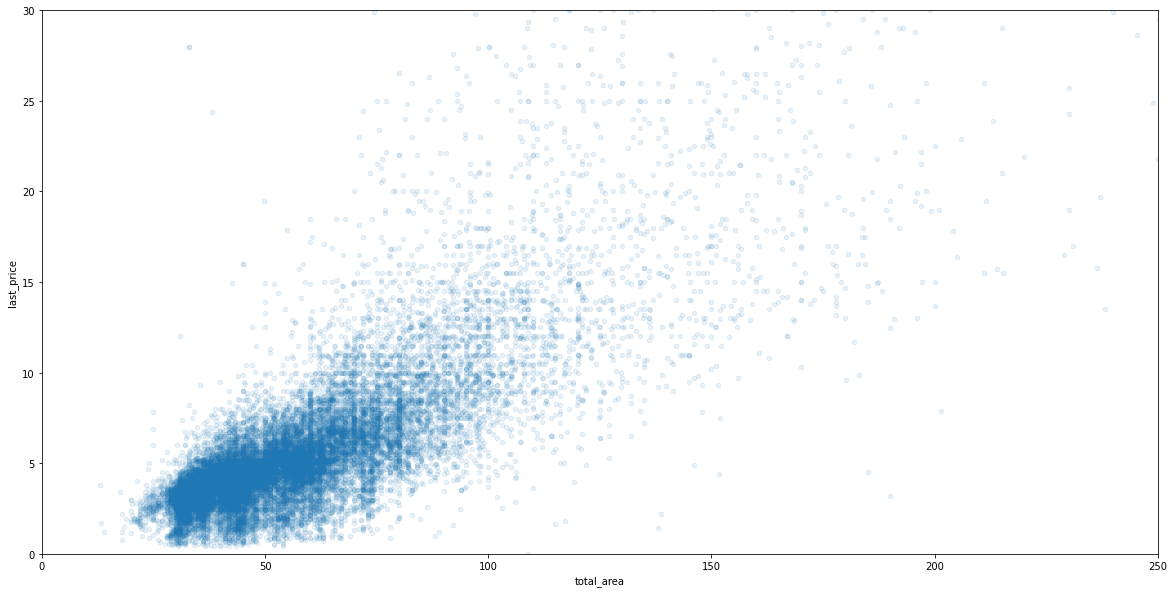

In [67]:
#зададим точкам графика прозрачность 0.1, чтобы выявить зону максимальной концентрации значений 
good_data.plot(y='last_price', x='total_area', kind='scatter', xlim=(0,250), ylim=(0,30), alpha=0.1, figsize=(20,10))

Определим коэффициент линейной корреляции Пирсона для общей площади и стоимости жилья:

In [68]:
print(good_data['last_price'].corr(good_data['total_area']))

0.5926334119299195


Выяснили очевидный факт, что между стоимостью жилья и его площадью существует корреляция. На стоимость жилья также влияют другие параметры, которые будут рассмотрены дальше

##### жилая площадь - 'living_area'

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

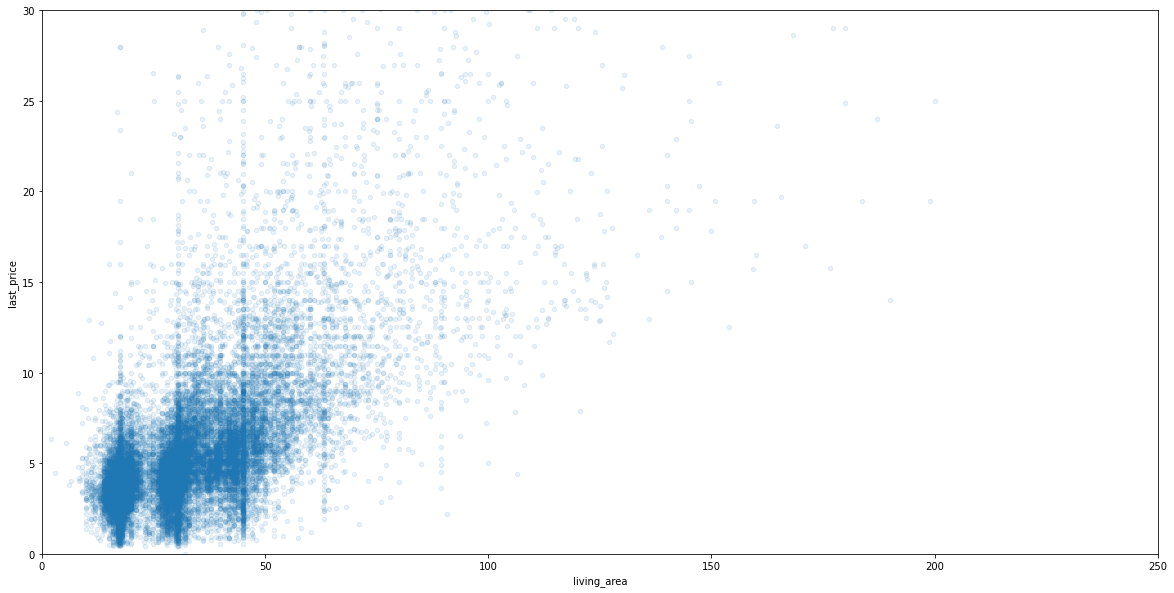

In [69]:
#зададим точкам графика прозрачность 0.1, чтобы выявить зону максимальной концентрации значений 
good_data.plot(y='last_price', x='living_area', kind='scatter', xlim=(0,250), ylim=(0,30), alpha=0.1, figsize=(20,10))

In [70]:
#коэффициент линейной корреляции Пирсона для жилой площади и стоимости жилья:
print(good_data['last_price'].corr(good_data['living_area']))

0.49063485661162726


На графике мы видим, как данные образуют полоски. Природа появления этих полос состоит в высокой распространенности типовых значений жилой площади и в зависимости от числа комнат. Как и в ситуации с общей площадью существует корреляция между жилой площадью и стоимостью жилья. При этом корреляция между жилой площадью и ценой меньше чем между общей площадью и ценой 

##### количество комнат - 'rooms'

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

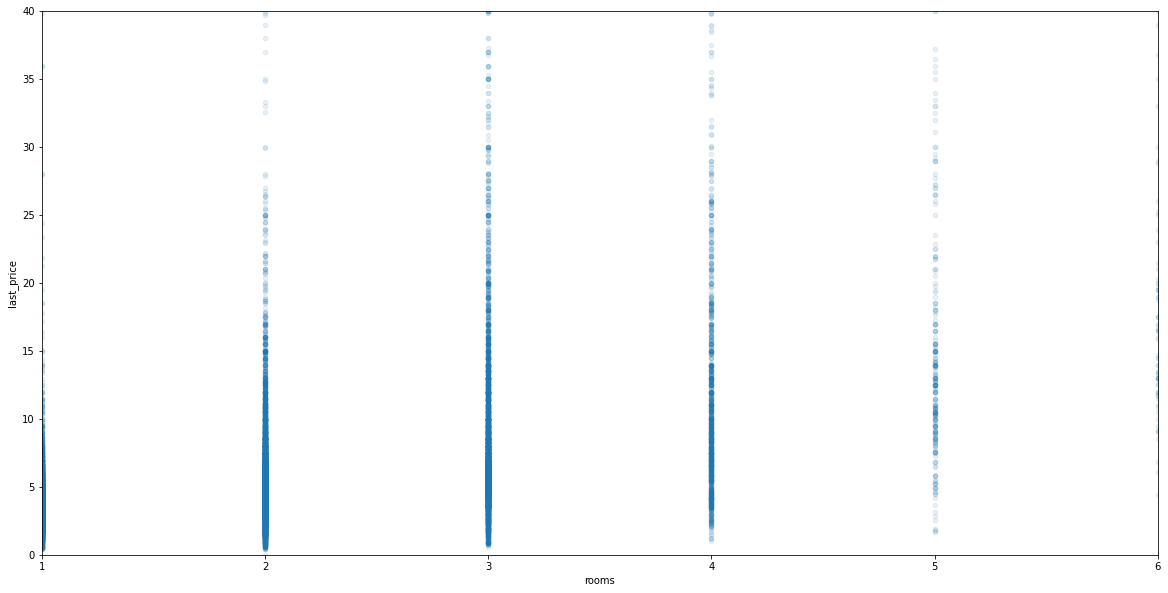

In [71]:
good_data.plot(y='last_price', x='rooms', kind='scatter', xlim=(1,6), ylim=(0,40), alpha=0.1, figsize=(20,10))

In [72]:
print(good_data['rooms'].corr(good_data['last_price']))

0.3242488225511766


Выявили низкую взаимосвязь. Данный вывод нуждается в дополнительной проверке, которая будет выполнена далее. Необходимо будет рассмотреть параметры, влияющие на стоимость для каждого в отдельности населенного пункта 

##### площадь кухни - 'kitchen_area'

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

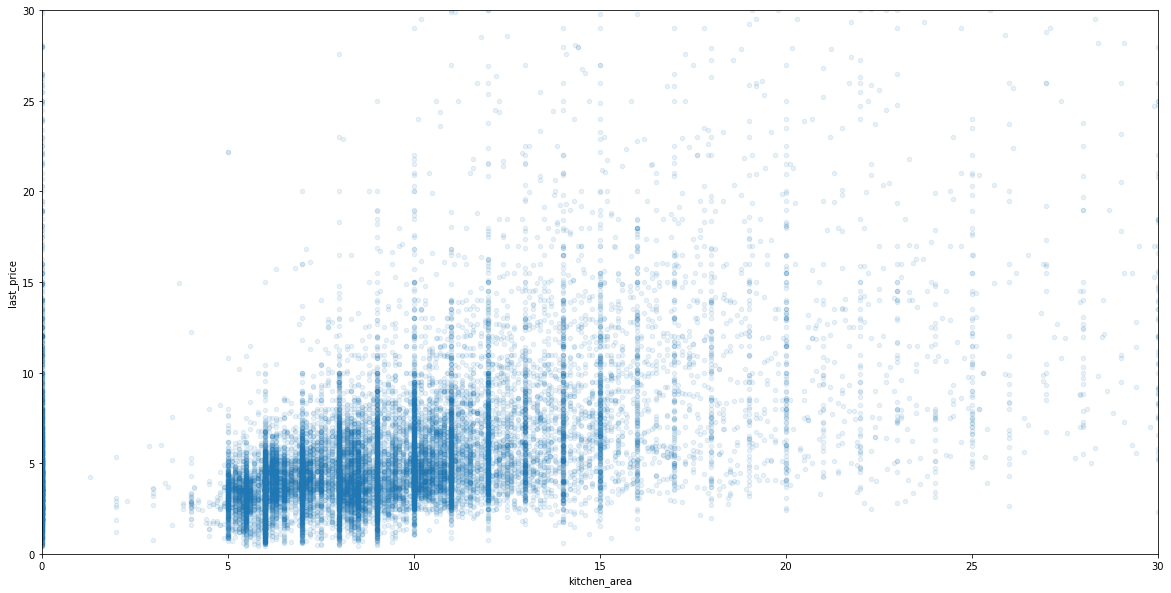

In [73]:
good_data.plot(y='last_price', x='kitchen_area', kind='scatter', xlim=(0,30), ylim=(0,30), alpha=0.1, figsize=(20,10))

In [74]:
print(good_data['last_price'].corr(good_data['kitchen_area']))

0.3466685098718918


На графике мы видим полоски - округленные значения кухонь, указанные в объявлениях. Визуально определяется взаимосвязь между площадью кухни и стоимостью жилья, при этом коэффициент линейной корреляции достаточно низкий. Чтобы понять влияние на коэффициент корреляции квартир с площадью кухни равной 0 (квартиры студии) исключим их из датасета 

In [75]:
good_data_kithen = good_data.query('kitchen_area >= 5')
print(good_data_kithen['last_price'].corr(good_data_kithen['kitchen_area']))

0.4911711797694297


После исключения квартир студий коэффициент корреляции увеличился с 0.34 до 0.49, что указывает на существующую взаимосвязь между площадью кухни и стоимостью жилого помещения

##### этаж - 'floor'

<AxesSubplot:xlabel='floor', ylabel='last_price'>

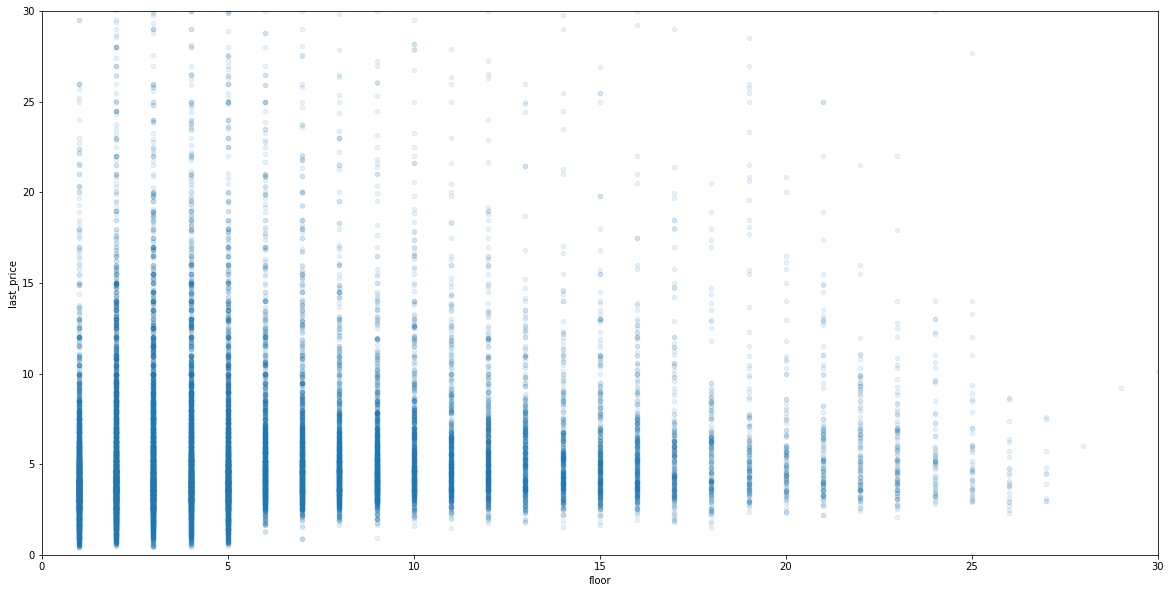

In [76]:
good_data.plot(y='last_price', x='floor', kind='scatter', xlim=(0,30), ylim=(0,30), alpha=0.1, figsize=(20,10))

In [77]:
print(good_data['floor'].corr(good_data['last_price']))

0.033267883926298585


Явная связь между этажом и стоимостью жилья исходя из анализа графика и коэффицента корреляции не прослеживается. Попробуем рассмотреть есть ли взаимосвязь между стоимостью жилого помещения и этажом в представлении первый, другой, последний:

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

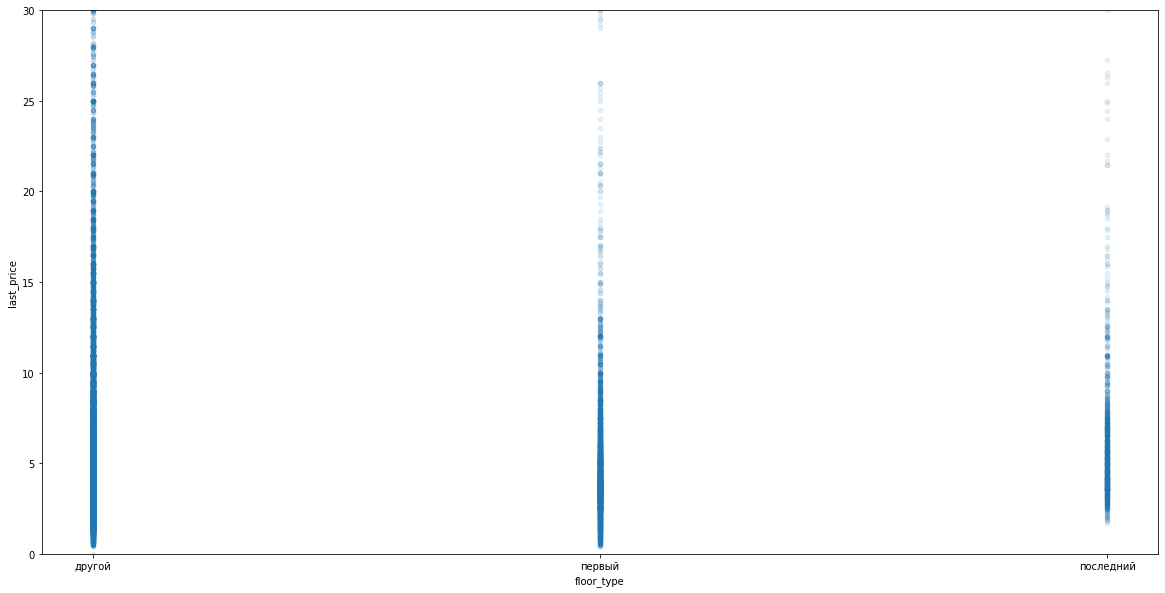

In [78]:
good_data.plot(y='last_price', x='floor_type', kind='scatter', ylim=(0,30), alpha=0.1, figsize=(20,10))

На полученном графике видно, что помещения с типом "другой" этаж в целом дорож, чем первый и последний 

##### даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='day', ylabel='last_price'>

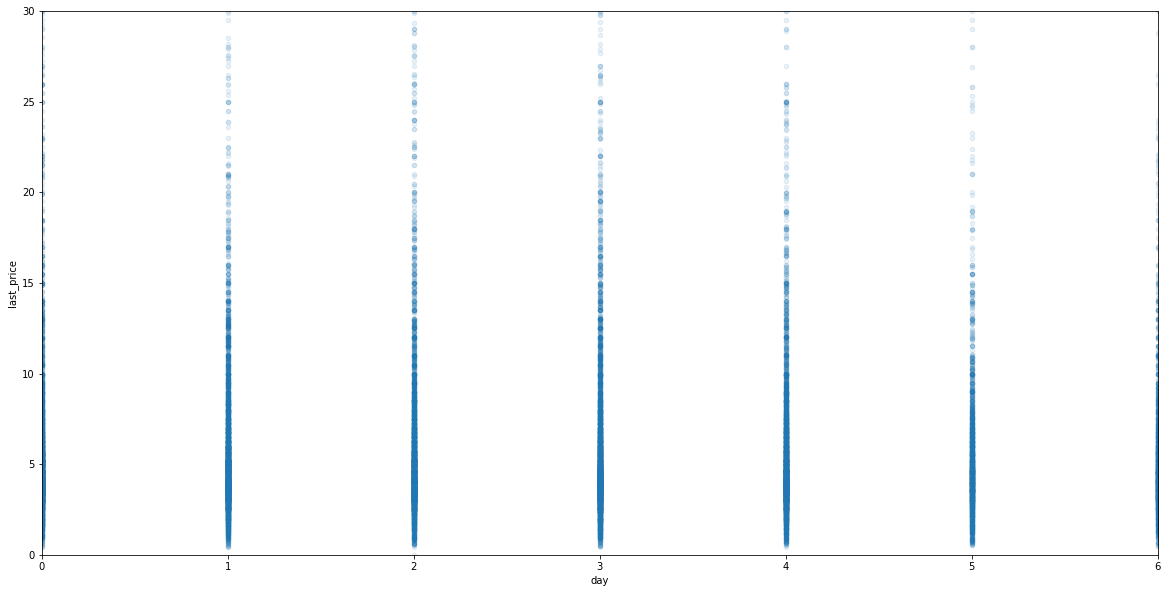

In [79]:
#График зависимости цены от дня размещения объявления
good_data.plot(y='last_price', x='day', kind='scatter', xlim=(0,6), ylim=(0,30), alpha=0.1, figsize=(20,10))

In [80]:
print(good_data['day'].corr(good_data['last_price']))

0.0040144284435778615


Зависимость между днем размещения объявления и стоимостью отсутствует

<AxesSubplot:xlabel='month', ylabel='last_price'>

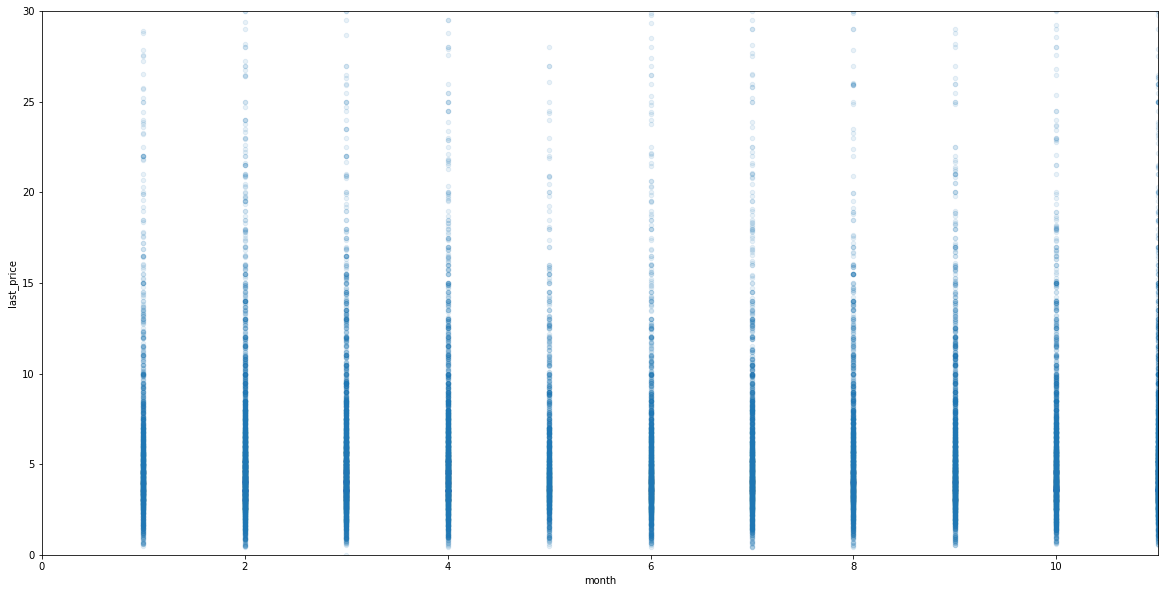

In [81]:
#График зависимости цены от месяца размещения объявления
good_data.plot(y='last_price', x='month', kind='scatter', xlim=(0,11), ylim=(0,30), alpha=0.1, figsize=(20,10))

In [82]:
print(good_data['month'].corr(good_data['last_price']))

0.00037351590036847714


Зависимость между месяцем размещения объявления и стоимостью отсутствует

<AxesSubplot:xlabel='year', ylabel='last_price'>

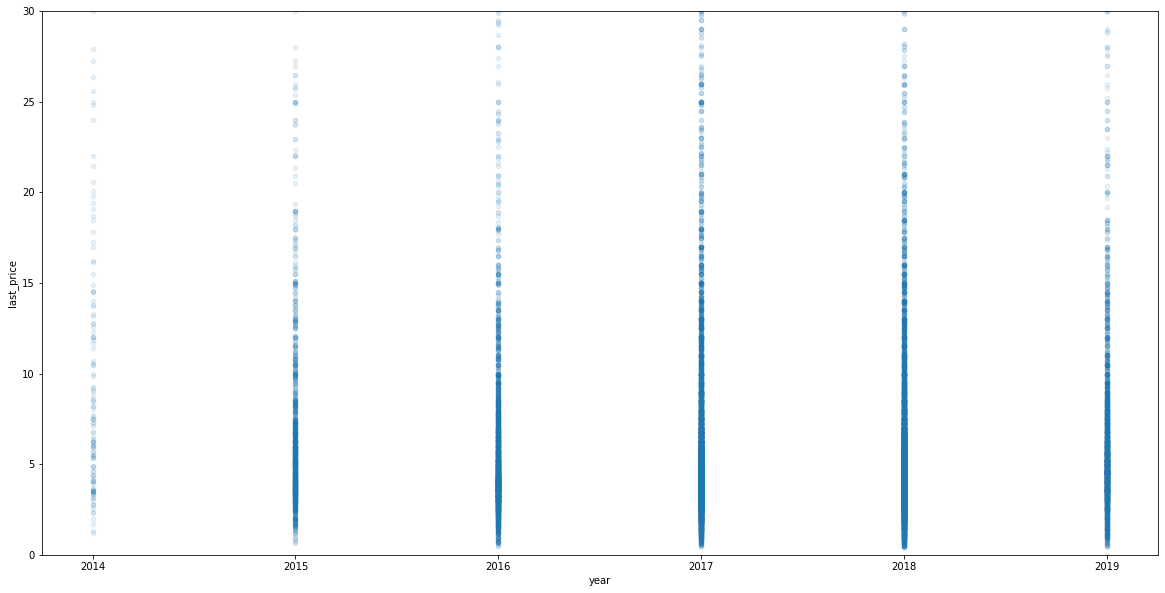

In [83]:
#График зависимости цены от года размещения объявления
good_data.plot(y='last_price', x='year', kind='scatter', ylim=(0,30), alpha=0.1, figsize=(20,10))

In [84]:
print(good_data['year'].corr(good_data['last_price']))

-0.035710859743646566


Зависимость между годом размещения объявления (с 2015 - 2019 год) и стоимостью отсутствует

**Вывод по анализу зависимости стоимости жилья от различных парамтров:**

1. Из рассмотренных параметров на стоимость жилого помещения влияют (в порядке убывания): общая площадь, жилая площадь, площадь кухни, количество комнат.
2. День, месяц, и год (с 2015 - 2019) не влияет на стоимость жилых помещений

#### Найдём среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Найдём населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [85]:
#В сводной таблице покажем цену квадратного метра по населенным пунктам (найдем среднее и медианное значение)  

In [86]:
price_square_location = good_data.pivot_table(index='locality_name', values = 'price_square', aggfunc = ['count', 'mean', 'median'])

In [87]:
#Переименуем столбцы
price_square_location.columns = ['число объявлений', 'средняя цена кв.м.', 'медианная цена кв.м']

In [88]:
#Выведем 10 населенных пунктов с самым большим количеством объявлений о продаже жилья
display(price_square_location.sort_values(by='число объявлений', ascending=False).head(10))

,число объявлений,средняя цена кв.м.,медианная цена кв.м
locality_name,,,
санкт-петербург,15381,114.051058,104.550
мурино,559,85.469428,84.970
кудрово,448,95.083951,95.270
шушары,435,78.278161,76.670
всеволожск,391,68.683760,65.790
пушкин,367,103.015477,99.990
колпино,338,75.424467,74.725
парголово,323,90.290062,91.920
гатчина,307,68.746319,67.800


In [89]:
#Выведем 10 населенных пунктов с самым большим количеством объявлений о продаже жилья
display(price_square_location.sort_values(by='медианная цена кв.м', ascending=False).head(10))

,число объявлений,средняя цена кв.м.,медианная цена кв.м
locality_name,,,
санкт-петербург,15381,114.051058,104.550
зеленогорск,24,115.121667,101.665
пушкин,367,103.015477,99.990
сестрорецк,183,101.757541,99.680
левашово,1,97.000000,97.000
кудрово,448,95.083951,95.270
парголово,323,90.290062,91.920
мистолово,11,98.551818,90.890
стрельна,43,88.267442,87.250


In [90]:
print(good_data.query('locality_name == "зеленогорск"'))

       total_images  last_price  total_area first_day_exposition  rooms  \
298               6        3.50        31.0           2016-04-05      1   
371              18        8.40        84.0           2018-06-26      2   
918              17        3.02        31.2           2019-04-16      1   
1992             19        6.10        50.0           2018-03-24      2   
2907             13        3.20        46.3           2018-03-31      2   
3399              4        6.40        67.2           2016-10-10      3   
3852             10        4.25        38.0           2017-11-30      1   
4348              6        2.30        31.0           2016-05-26      1   
4803             11        5.50        49.0           2017-10-24      2   
6110              8        9.60       180.1           2017-03-07      4   
7168             13        5.00        46.3           2017-09-12      2   
8670             11        5.00        40.0           2018-06-29      1   
9293              0      

В список попали населенные пункты с низким количеством поданных объявлений: Зеленогорск - 24 шт., Репино - 4 шт., Лисий нос - 3 шт., Мистолово - 11 шт., Левашово - 1 шт. 
Наличие уникальных объектов в данных населенных пунктов с высокой стоимостью оказывает сильное влияние на среднее и медианное значение стоимости квадратного метра. Например, в Зеленогорске есть жилое помещение стоимостью более 23 млн. руб. с общей площадью 71 кв.м. 
Установим минимальное значение числа объявлений - не менее 100 шт, чтобы снизить влияние таких объектов на цену квадратного метра

In [91]:
#Выведем 10 населенных пунктов с самой высокой стоимостью квадратного метра жилья:
price_square_location = price_square_location[price_square_location['число объявлений'] >= 100]
display(price_square_location.sort_values(by='медианная цена кв.м', ascending=False).head(10))

,число объявлений,средняя цена кв.м.,медианная цена кв.м
locality_name,,,
санкт-петербург,15381,114.051058,104.550
пушкин,367,103.015477,99.990
сестрорецк,183,101.757541,99.680
кудрово,448,95.083951,95.270
парголово,323,90.290062,91.920
мурино,559,85.469428,84.970
петергоф,201,84.757562,82.140
бугры,111,80.354505,80.950
шушары,435,78.278161,76.670


In [92]:
#Выведем 10 населенных пунктов с самой низкой стоимостью квадратного метра жилья:
display(price_square_location.sort_values(by='медианная цена кв.м').head(10))

,число объявлений,средняя цена кв.м.,медианная цена кв.м
locality_name,,,
сланцы,112,18.185893,18.255
волхов,111,35.087477,35.000
кириши,125,38.875600,37.960
кингисепп,104,46.784038,46.775
тосно,102,58.889020,57.975
выборг,235,58.238213,58.310
всеволожск,391,68.683760,65.790
сертолово,138,69.036667,67.520
гатчина,307,68.746319,67.800


#### Рассмотрим только жилые помещения в Санкт-Петербурге и вычислим среднюю цену каждого километра от центра. 

In [93]:
#сделаем срез по строкам, содержащим информацию о жилых помещениях только в Санкт-Петербурге
good_data_spb = good_data.query('locality_name == "санкт-петербург"').reset_index(drop=True)

In [94]:
#добавим столбец 'center_km' содержащий информацию об удаленности помещения от центра округленно до ближайшего целого значения
good_data_spb['center_km'] = good_data_spb['cityCenters_nearest'].apply(round)

In [95]:
#создадим сводную таблицу содержащую информацию о цене квадратного метра(среднее и медианное значение) в зависимости от расстояния в километрах от центра города
good_data_spb_pivot = good_data_spb.pivot_table(index='center_km', values='price_square', aggfunc = ['count', 'mean', 'median'])

In [96]:
#Переименуем столбцы и индекс
good_data_spb_pivot.columns = ['число объявлений', 'средняя цена км', 'медианная цена км']
good_data_spb_pivot.index.names = ['расстяние от центра, км']

In [97]:
display(good_data_spb_pivot)

,число объявлений,средняя цена км,медианная цена км
"расстяние от центра, км",,,
0,26,238.373462,164.075
1,181,171.493315,127.440
2,292,154.193664,121.135
3,339,120.756755,108.140
4,675,131.454341,117.690
5,877,138.525393,126.920
6,583,148.985935,129.920
7,411,155.376594,126.060
8,580,124.107707,122.385


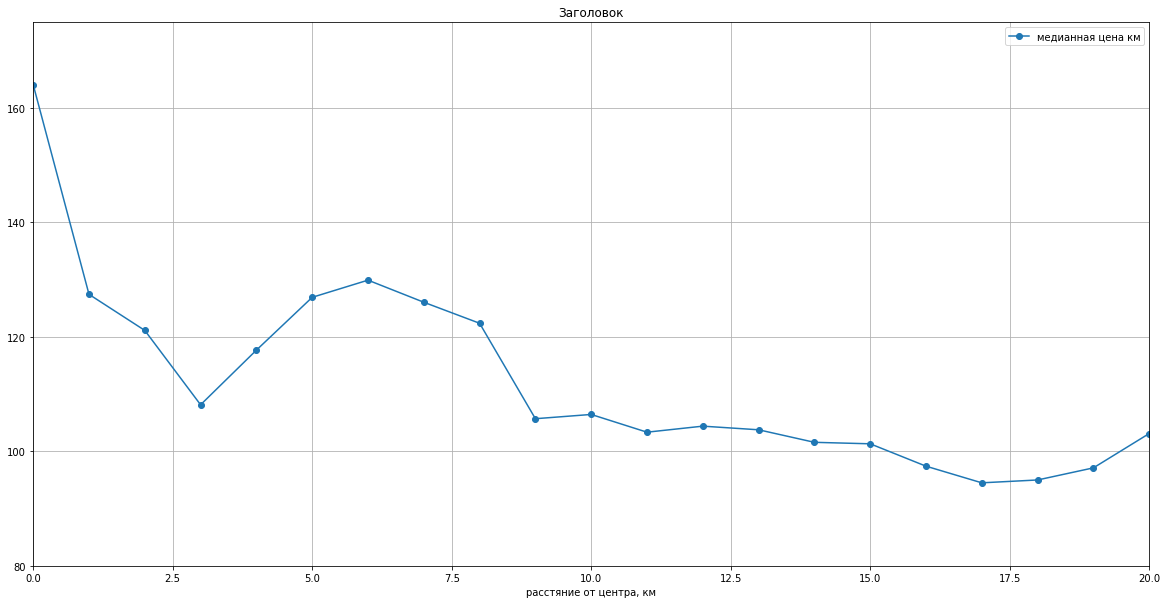

In [98]:
#График зависимости медианы цены квадратного метра от расстояния от центра:
good_data_spb_pivot\
    .plot(y='медианная цена км', style='o-', ylim=(80,175), xlim=(0,20), figsize=(20,10), grid = True, title = 'Заголовок')
plt.show()

In [99]:
#создадим в good_data_spb столбец 'median_km' и заполним его медианными значениями для соответствующего расстояния до центра 
def def_x(n):
    r = round(good_data_spb_pivot['медианная цена км'][n],2)
    return r
good_data_spb['median_km'] = good_data_spb['center_km'].apply(def_x)

In [100]:
#Определим коэффициент корреляции для цены квадратного метра и расстояния от центра Санкт-Петербурга:
print(good_data_spb['median_km'].corr(good_data_spb['center_km']))

-0.8713243197260161


Самая высокая цена за кв.м. жилья в центральной части Санкт-Петербурга (164 тыс.руб/кв.м). Выявлена высокая корреляция данных между расстоянием от центра Санкт-Петербурга и стоимостью квадратного метра жилья - чем дальше от центра, тем меньше стоимось (поэтому коэффициент корреляции имеет знак "-"). 

**Вывод по исследовательскому анализу данных:**

Был проведен исследовательский анализ данных. Выявлены следующие зависимости:
1. На стоимость жилого помещения влияют (в порядке убывания): общая площадь, жилая площадь, площадь кухни, количество комнат;
2. День, месяц, и год (с 2015 - 2019) не влияет на стоимость жилых помещений;
3. Самая высокая цена жилья в населенных пунктах: Санкт-Петербург, Пушкин, Сестрорецк, кудровоб парголово:
4. Самая низкая цена жилья в населенных пунктах: Сланцы, Волхов, Кириши, Кингисепп, Тосно
5. Самая высокая цена за кв.м. жилья в центральной части Санкт-Петербурга (164 тыс.руб/кв.м). Существует зависимость стоимости жилья от расстояния до центра города. Коэффициент корреляции = -0.87 


### Общий вывод

С помощью python и библиотек pandas, datetime, matplotlib.pyplot была проведена предобработка и исследовательский анализ данных по жилым помещениям, выставленным на продажу в Санкт-Петербурге и Ленинградской области.
Предобработка данных, включала в себя:
- Изменение типов данных;
- Фильтрацию ошибочных данных в датасете;
- Поиск дубликатов в наименовании населенных пунктов и их устранение;
- Заполнение пропусков в данных в соответствии с определенным алгоритмом.

После предобработки данных количество строк в датасете изменилось с 23698 до 23380 штук.
В результате проведенного исследовательского анализа установлено:
- Среднее значение времени продажи составляет 169 дней - около полугода (медианное 94 дня). Быстрыми продажами можно считать объявления о продаже помещений, срок экспозиции которых менее 200 дней;
- На стоимость жилого помещения влияют (в порядке убывания): общая площадь, жилая площадь, площадь кухни, количество комнат, этаж. Промежуточные этажи в целом дороже, чем первый и последний;
- День, месяц, и год (с 2015 - 2019) не влияет на стоимость жилых помещений;
- Самая высокая цена жилья в населенных пунктах: Санкт-Петербург, Пушкин, Сестрорецк, кудровоб парголово:
- Самая низкая цена жилья в населенных пунктах: Сланцы, Волхов, Кириши, Кингисепп, Тосно
- Самая высокая цена за кв.м. жилья в центральной части Санкт-Петербурга (164 тыс.руб/кв.м). Существует зависимость стоимости жилья от расстояния до центра города. Коэффициент корреляции = -0.87